In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('OrderLog20181229.csv', delimiter=';')

In [2]:
df.head()

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE
0,1,ABRD,S,100000000000,1,1,150.0,500,NaN,NaN
1,2,ABRD,S,100000000000,2,1,146.0,40,NaN,NaN
2,3,ABRD,S,100000000000,3,1,147.0,70,NaN,NaN
3,4,ABRD,B,100000000000,4,1,135.0,10,NaN,NaN
4,5,ABRD,S,100000000000,5,1,143.0,10,NaN,NaN


In [ ]:
'''
Выделим нужные нам колонки
'''

In [3]:
df = df[['SECCODE', 'BUYSELL', 'ACTION', 'PRICE', 'VOLUME']]
df.shape

(2024811, 5)

In [4]:
df.head()

,SECCODE,BUYSELL,ACTION,PRICE,VOLUME
0,ABRD,S,1,150.0,500
1,ABRD,S,1,146.0,40
2,ABRD,S,1,147.0,70
3,ABRD,B,1,135.0,10
4,ABRD,S,1,143.0,10


In [ ]:
'''
Построим гистограмму
'''

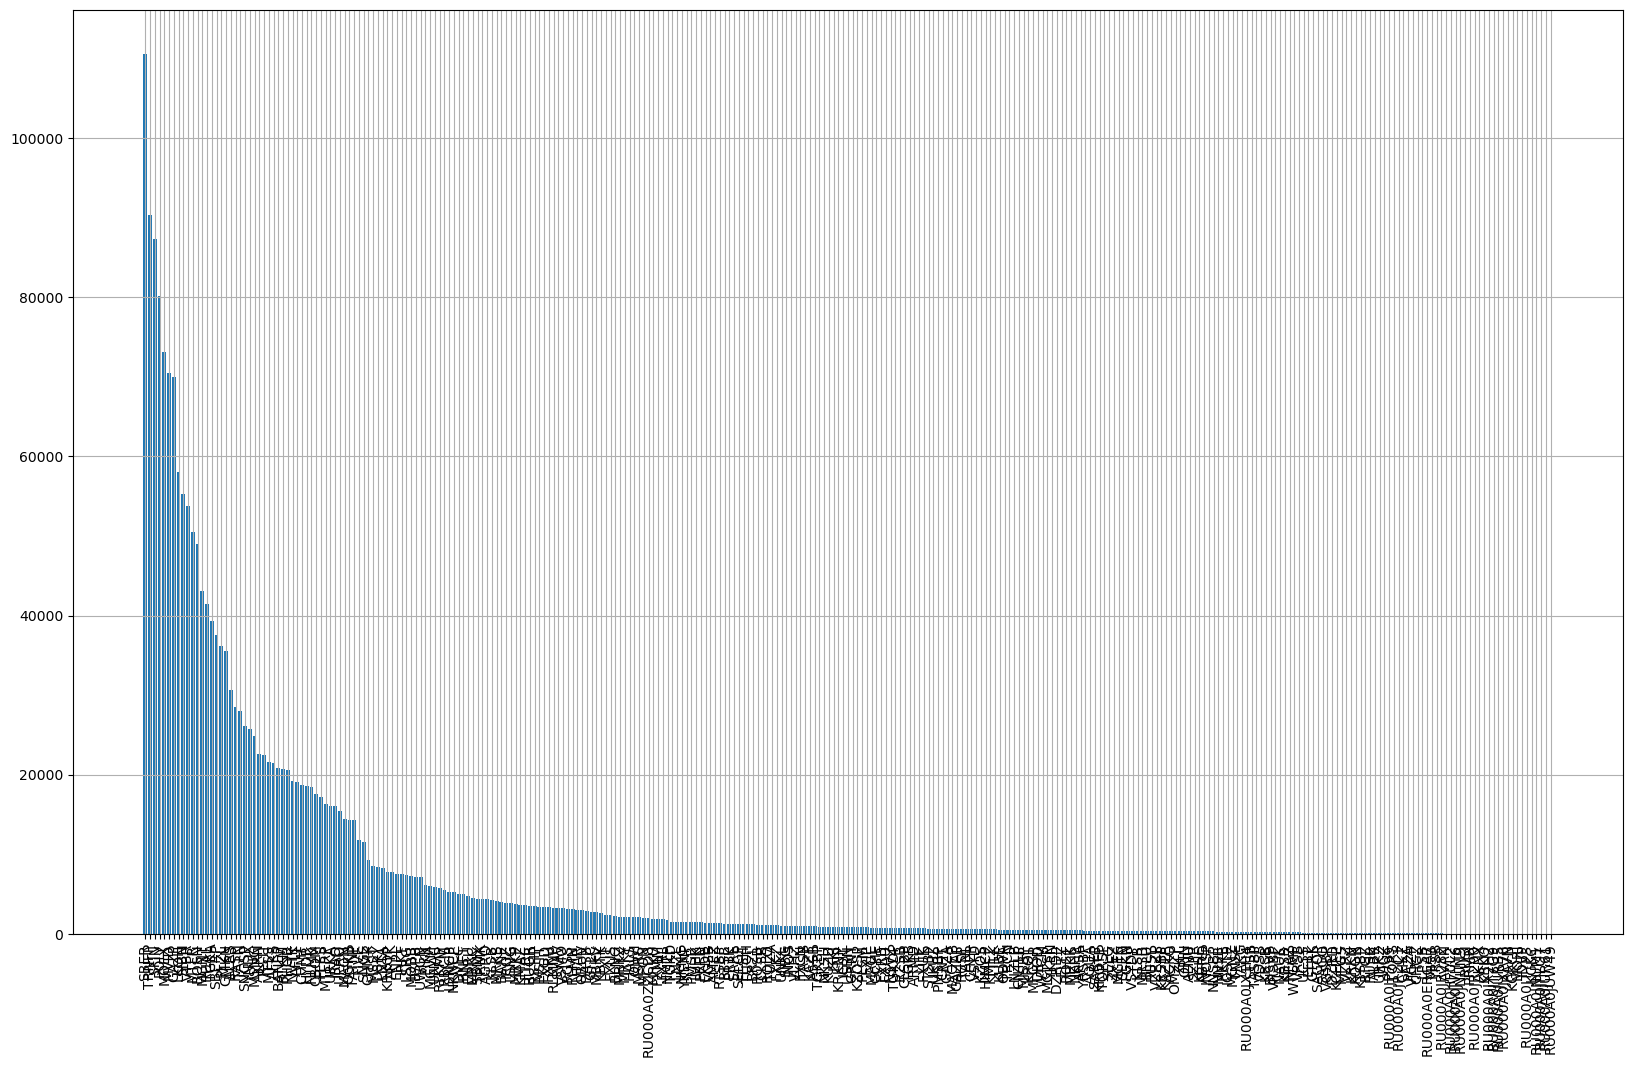

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,12))
plt.xticks(rotation=90)
ax = fig.gca()

freq = df.SECCODE.value_counts()
plt.bar(freq.index, freq.values)
plt.grid()

In [ ]:
'''
Малоинформативно.
Посмотрим на структуру.
'''

In [6]:
df.SECCODE.value_counts()

SBER            110586
TRNFP            90356
SFIN             87376
POLY             80122
MOEX             73074
                 ...  
KGKC                 1
RU000A0JNUM1         1
RU000A0JPLG7         1
RU000A0JUR61         1
RU000A0JUW49         1
Name: SECCODE, Length: 297, dtype: int64

In [ ]:
'''
Обрежем по 0.75
'''

In [8]:
vals = df.SECCODE.value_counts().values
np.quantile(vals, 0.75)

4098.0

In [9]:
our_choice = df.SECCODE.value_counts()[df.SECCODE.value_counts() > 4098.0]

In [10]:
best_companies = our_choice.index
best_companies

Index(['SBER', 'TRNFP', 'SFIN', 'POLY', 'MOEX', 'MVID', 'GAZP', 'LKOH', 'SIBN',
       'VTBR', 'MTLR', 'ROSN', 'MGNT', 'RUAL', 'TGKA', 'SBERP', 'PLZL', 'GMKN',
       'ALRS', 'RASP', 'TATN', 'SNGSP', 'YNDX', 'MSNG', 'AKRN', 'RSTI', 'MTSS',
       'AFKS', 'BANEP', 'RTKM', 'PHOR', 'NVTK', 'AFLT', 'CHMF', 'HYDR', 'NLMK',
       'CBOM', 'FEES', 'MTLRP', 'URKA', 'IRAO', 'UPRO', 'MAGN', 'OGKB',
       'TATNP', 'FIVE', 'SNGS', 'CHMK', 'MSST', 'DSKY', 'LNTA', 'KRKOP',
       'APTK', 'ENPL', 'IRKT', 'LSRG', 'MOBB', 'BSPB', 'UWGN', 'PIKK', 'MGVM',
       'UNAC', 'RTKMP', 'RBCM', 'LSNGP', 'NKNCP', 'DVEC', 'RNFT', 'ENRU',
       'MRKC', 'SBMX', 'TRMK', 'AGRO', 'KLSB'],
      dtype='object')

In [ ]:
'''
Строим гистограмму повторно.
'''

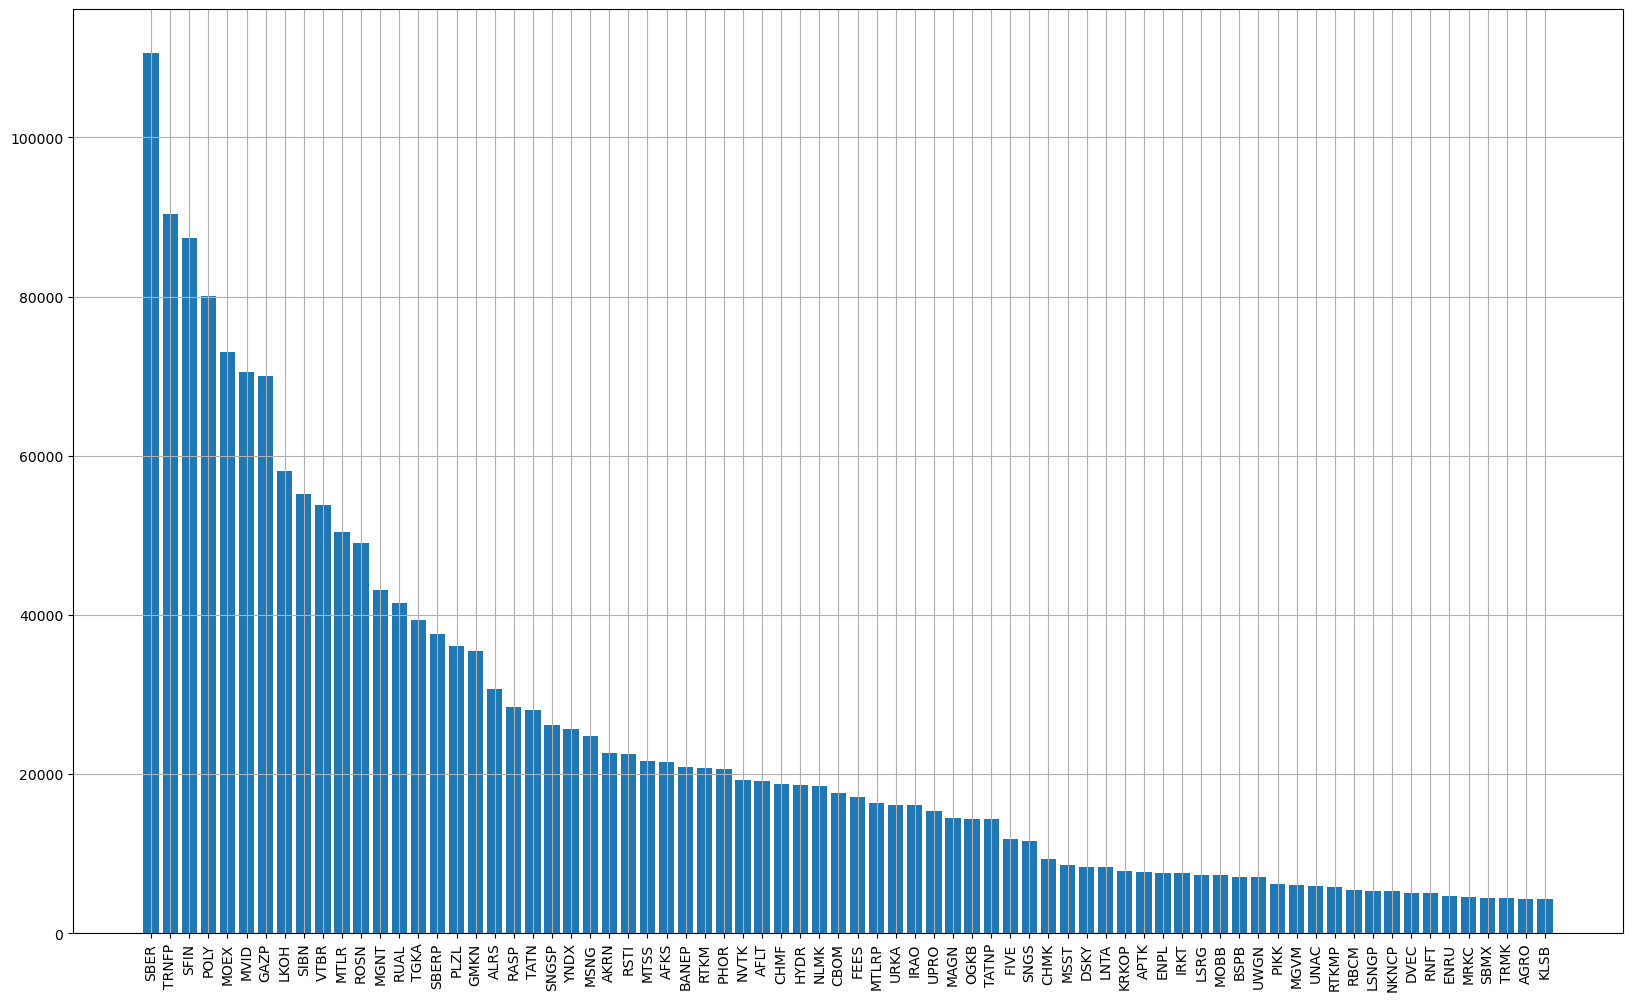

In [11]:
fig = plt.figure(figsize = (20,12))
plt.xticks(rotation=90)
ax = fig.gca()

plt.bar(our_choice.index, our_choice.values)
plt.grid()

In [13]:
df = df[df.SECCODE.isin(best_companies)]
df

,SECCODE,BUYSELL,ACTION,PRICE,VOLUME
6,AFKS,B,1,7.210,700
7,AFKS,B,1,7.295,100
8,AFKS,B,1,7.650,100
9,AFKS,S,1,8.621,1200
10,AFKS,S,1,8.625,100
...,...,...,...,...,...
2024806,CBOM,S,0,5.207,62300
2024807,CBOM,S,0,5.211,87600
2024808,CBOM,S,0,5.215,41900
2024809,PIKK,B,0,374.000,1250


In [ ]:
'''
Создадим словарь по названиям компаний
'''

In [14]:
datasets = {tic : df[df.SECCODE == tic] for tic in best_companies}

In [ ]:
'''
Посмотрим на Сбер
'''

In [18]:
datasets['SBER']

,SECCODE,BUYSELL,ACTION,PRICE,VOLUME
56,SBER,B,1,175.00,10
59,SBER,S,1,193.99,500
379,SBER,S,1,190.00,50
394,SBER,S,1,188.41,8410
426,SBER,B,1,183.00,10
...,...,...,...,...,...
2024701,SBER,B,0,185.01,3970
2024729,SBER,S,0,187.03,200
2024750,SBER,B,0,186.12,30
2024755,SBER,B,0,185.48,830


In [ ]:
'''
Заменим BAY на -1 и SELL на 1
'''

In [19]:
datasets['SBER'].BUYSELL = datasets['SBER'].BUYSELL.replace({'B' : -1, 'S' : 1})
datasets['SBER']['dir_vol'] = datasets['SBER']['VOLUME']*datasets['SBER']['BUYSELL']

C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\1411140745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets['SBER'].BUYSELL = datasets['SBER'].BUYSELL.replace({'B' : -1, 'S' : 1})
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\1411140745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets['SBER']['dir_vol'] = datasets['SBER']['VOLUME']*datasets['SBER']['BUYSELL']


In [20]:
datasets['SBER']

,SECCODE,BUYSELL,ACTION,PRICE,VOLUME,dir_vol
56,SBER,-1,1,175.00,10,-10
59,SBER,1,1,193.99,500,500
379,SBER,1,1,190.00,50,50
394,SBER,1,1,188.41,8410,8410
426,SBER,-1,1,183.00,10,-10
...,...,...,...,...,...,...
2024701,SBER,-1,0,185.01,3970,-3970
2024729,SBER,1,0,187.03,200,200
2024750,SBER,-1,0,186.12,30,-30
2024755,SBER,-1,0,185.48,830,-830


In [ ]:
'''
Построим график с кумулятивной суммой по оси y. Верхняя граница у 17 500 000
'''

C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\1073765537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets['SBER']['cumvol'] = datasets['SBER']['dir_vol'].cumsum()
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\1073765537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets['SBER']['x'] = np.arange(len(datasets['SBER']))


<AxesSubplot:xlabel='x', ylabel='cumvol'>

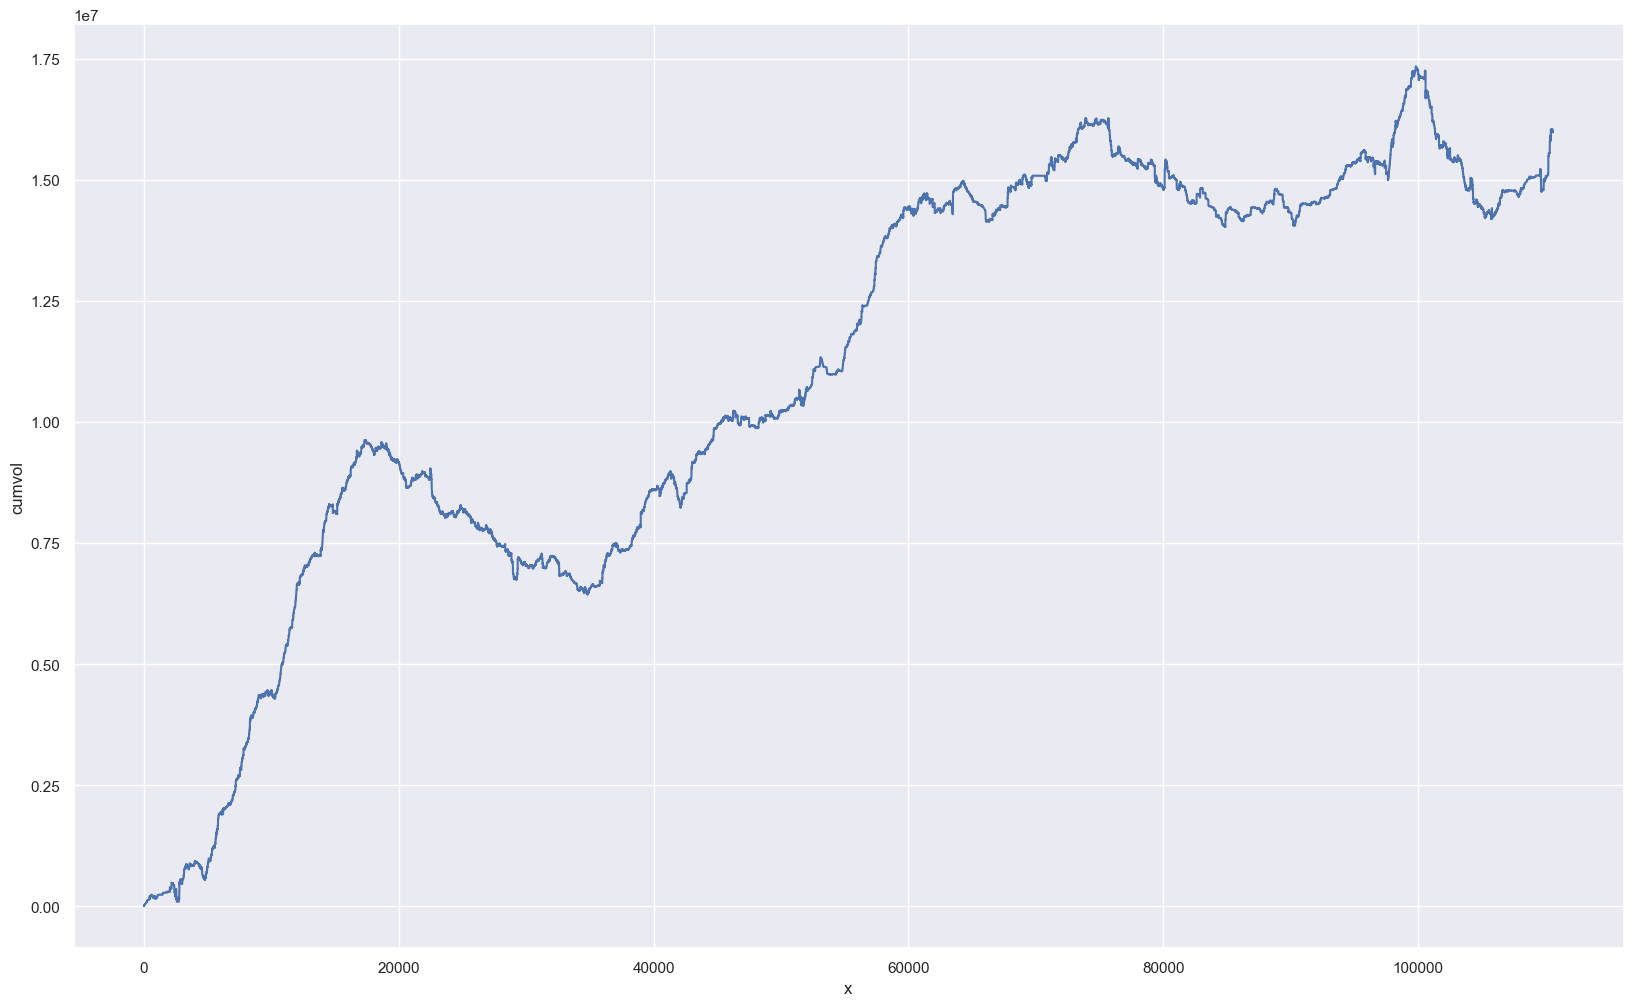

In [21]:
import seaborn as sns
plt.figure(figsize = (20,12))
sns.set_theme()
datasets['SBER']['cumvol'] = datasets['SBER']['dir_vol'].cumsum()
datasets['SBER']['x'] = np.arange(len(datasets['SBER']))
sns.lineplot(data = datasets['SBER'], x = 'x', y='cumvol')

In [ ]:
'''
Выведем для ACTION == 1 (Завершенные сделки)
'''

<AxesSubplot:xlabel='x', ylabel='cumvol'>

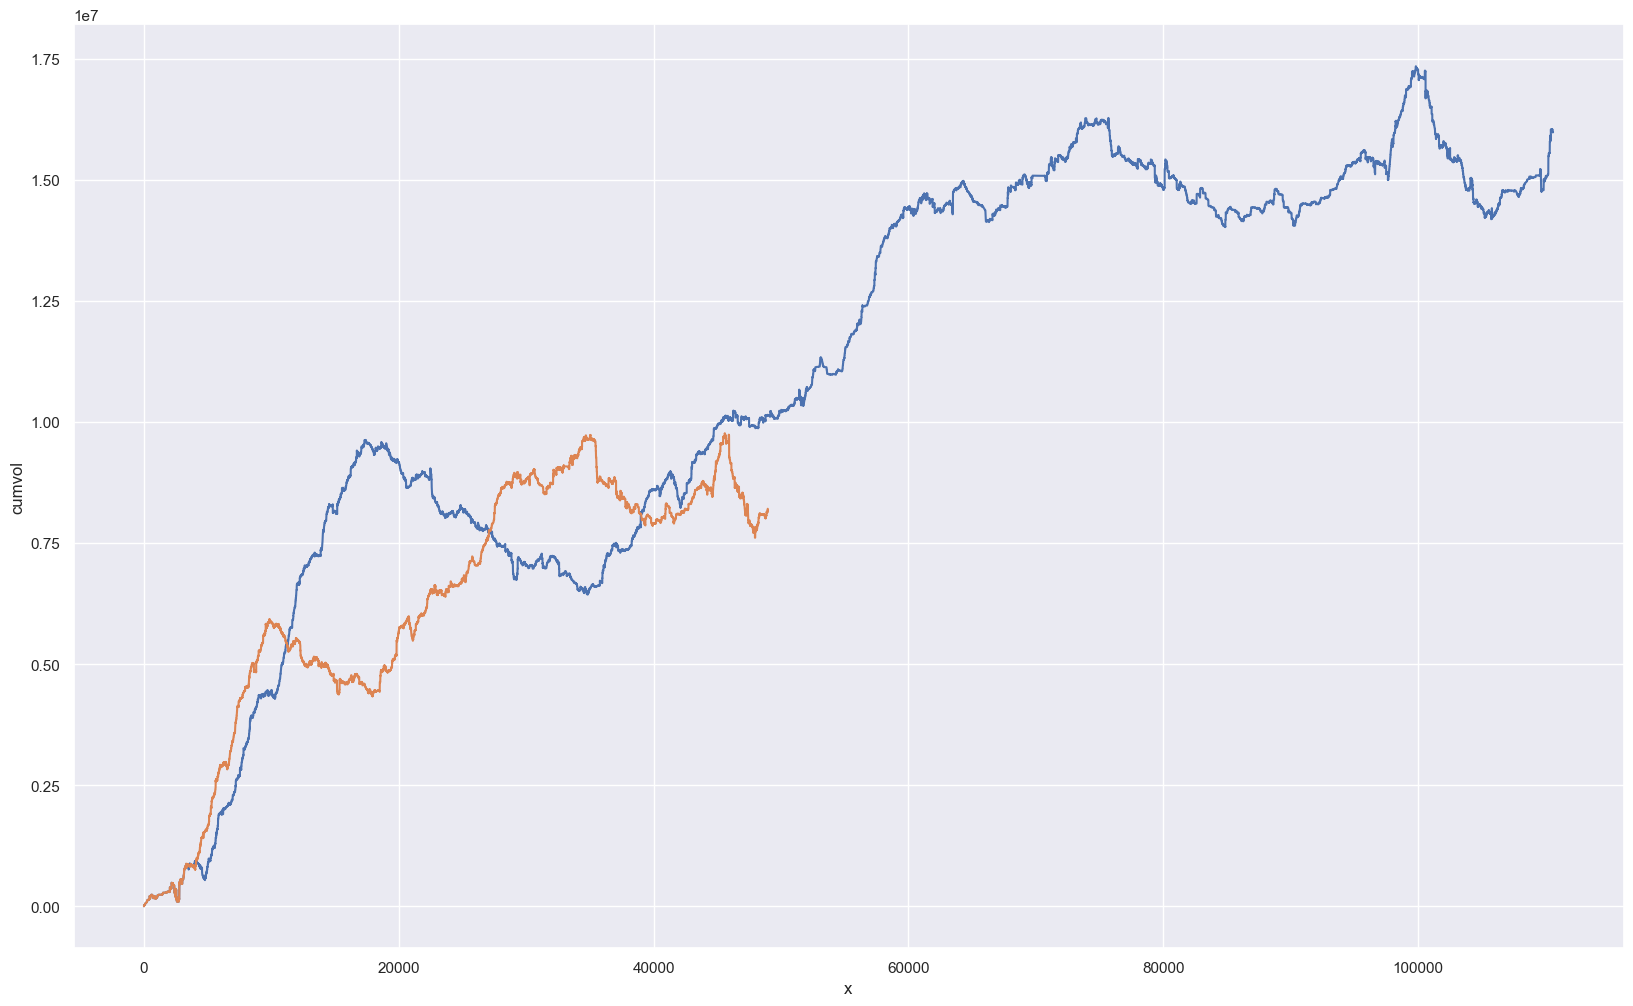

In [22]:
plt.figure(figsize = (20,12))
sns.set_theme()
d_action = datasets['SBER'][datasets['SBER']['ACTION'] == 1].drop(columns = ['cumvol','x'])
d_action['cumvol'] = d_action['dir_vol'].cumsum()
d_action['x'] = np.arange(len(d_action))
sns.lineplot(data = datasets['SBER'], x = 'x', y='cumvol')
sns.lineplot(data = d_action, x = 'x', y='cumvol')

In [ ]:
'''
Приверно соответствует, с поправкой на масштаб.
Посмотрим то же самое для POLY
'''

In [24]:
datasets['POLY']

,SECCODE,BUYSELL,ACTION,PRICE,VOLUME
414,POLY,B,1,700.0,100
2305,POLY,S,1,755.0,500
4699,POLY,S,1,749.9,2
4703,POLY,S,1,744.9,2
4710,POLY,S,1,739.9,2
...,...,...,...,...,...
2024051,POLY,S,0,735.0,13
2024052,POLY,S,0,735.5,30
2024053,POLY,S,0,737.5,50
2024095,POLY,B,0,728.3,50


C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\3858142642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets['POLY'].BUYSELL = datasets['POLY'].BUYSELL.replace({'B' : -1, 'S' : 1})
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\3858142642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets['POLY']['dir_vol'] = datasets['POLY']['VOLUME']*datasets['POLY']['BUYSELL']
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\3858142642.py:7: SettingWithCopyWarning: 
A value is trying to be s

<AxesSubplot:xlabel='x', ylabel='cumvol'>

C:\Users\Luther\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


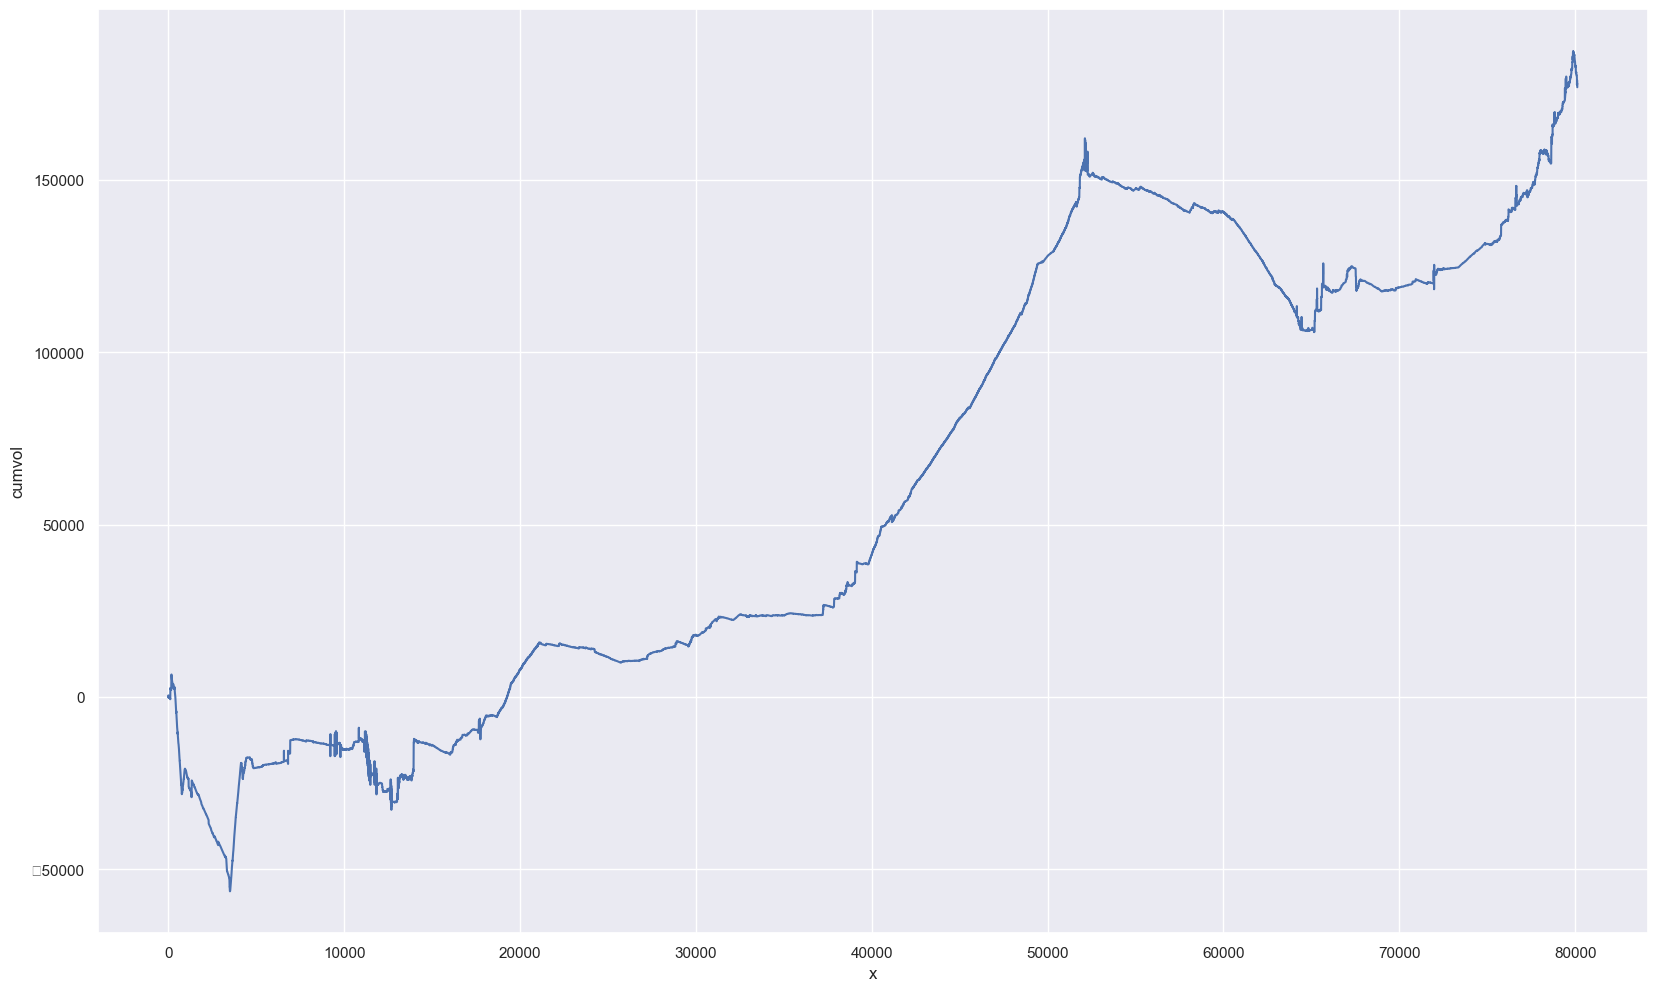

In [25]:
datasets['POLY'].BUYSELL = datasets['POLY'].BUYSELL.replace({'B' : -1, 'S' : 1})
datasets['POLY']['dir_vol'] = datasets['POLY']['VOLUME']*datasets['POLY']['BUYSELL']


plt.figure(figsize = (20,12))
sns.set_theme()
datasets['POLY']['cumvol'] = datasets['POLY']['dir_vol'].cumsum()
datasets['POLY']['x'] = np.arange(len(datasets['POLY']))
sns.lineplot(data = datasets['POLY'], x = 'x', y='cumvol')

In [ ]:
'''
Вывод:
Без времени очень сложно анализировать графики
'''

In [26]:
df = pd.read_csv('OrderLog20181229.csv', delimiter=';')

In [27]:
pd.to_datetime(df.TIME)

0         1970-01-01 00:01:40.000000000
1         1970-01-01 00:01:40.000000000
2         1970-01-01 00:01:40.000000000
3         1970-01-01 00:01:40.000000000
4         1970-01-01 00:01:40.000000000
                       ...             
2024806   1970-01-01 00:03:04.459892439
2024807   1970-01-01 00:03:04.459892738
2024808   1970-01-01 00:03:04.459893066
2024809   1970-01-01 00:03:04.459893376
2024810   1970-01-01 00:03:04.459893668
Name: TIME, Length: 2024811, dtype: datetime64[ns]

In [ ]:
'''
Старт примем за 0. Количество по секундам уменьшим в 10000000 раз
'''

In [28]:
df['TIME'] = df['TIME'] - df['TIME'][0]
df['TIME'] = pd.to_timedelta(df['TIME']/1000000, unit='s')

In [ ]:
'''
Выведем результат
'''

In [29]:
df = df[['SECCODE', 'BUYSELL', 'ACTION', 'PRICE', 'VOLUME', 'TIME']]
df

,SECCODE,BUYSELL,ACTION,PRICE,VOLUME,TIME
0,ABRD,S,1,150.000,500,0 days 00:00:00
1,ABRD,S,1,146.000,40,0 days 00:00:00
2,ABRD,S,1,147.000,70,0 days 00:00:00
3,ABRD,B,1,135.000,10,0 days 00:00:00
4,ABRD,S,1,143.000,10,0 days 00:00:00
...,...,...,...,...,...,...
2024806,CBOM,S,0,5.207,62300,0 days 23:27:39.892439
2024807,CBOM,S,0,5.211,87600,0 days 23:27:39.892738
2024808,CBOM,S,0,5.215,41900,0 days 23:27:39.893066
2024809,PIKK,B,0,374.000,1250,0 days 23:27:39.893376


In [ ]:
'''
Зададим стартовую дату
'''

In [30]:
df['TIME'] = pd.to_datetime('2018-12-29 00:00:00') + df['TIME']
df

,SECCODE,BUYSELL,ACTION,PRICE,VOLUME,TIME
0,ABRD,S,1,150.000,500,2018-12-29 00:00:00.000000
1,ABRD,S,1,146.000,40,2018-12-29 00:00:00.000000
2,ABRD,S,1,147.000,70,2018-12-29 00:00:00.000000
3,ABRD,B,1,135.000,10,2018-12-29 00:00:00.000000
4,ABRD,S,1,143.000,10,2018-12-29 00:00:00.000000
...,...,...,...,...,...,...
2024806,CBOM,S,0,5.207,62300,2018-12-29 23:27:39.892439
2024807,CBOM,S,0,5.211,87600,2018-12-29 23:27:39.892738
2024808,CBOM,S,0,5.215,41900,2018-12-29 23:27:39.893066
2024809,PIKK,B,0,374.000,1250,2018-12-29 23:27:39.893376


In [31]:
df = df[df.SECCODE.isin(best_companies)]
datasets = {tic : df[df.SECCODE == tic] for tic in best_companies}

In [32]:
datasets['SBER'].BUYSELL = datasets['SBER'].BUYSELL.replace({'B' : -1, 'S' : 1})
datasets['SBER']['dir_vol'] = datasets['SBER']['VOLUME']*datasets['SBER']['BUYSELL']

C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\1411140745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets['SBER'].BUYSELL = datasets['SBER'].BUYSELL.replace({'B' : -1, 'S' : 1})
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\1411140745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datasets['SBER']['dir_vol'] = datasets['SBER']['VOLUME']*datasets['SBER']['BUYSELL']


In [33]:
datasets['SBER'] = datasets['SBER'].set_index('TIME')
datasets['SBER'] = datasets['SBER'].resample('15S').aggregate({'dir_vol' : np.sum, 'PRICE' : np.mean})
datasets['SBER'].isna().any()

dir_vol    False
PRICE       True
dtype: bool

In [ ]:
'''
Построим два графика к различием по оси x.
Первый с по-секундной разницей, второй с len(datasets['SBER']).
'''

<AxesSubplot:ylabel='PRICE'>

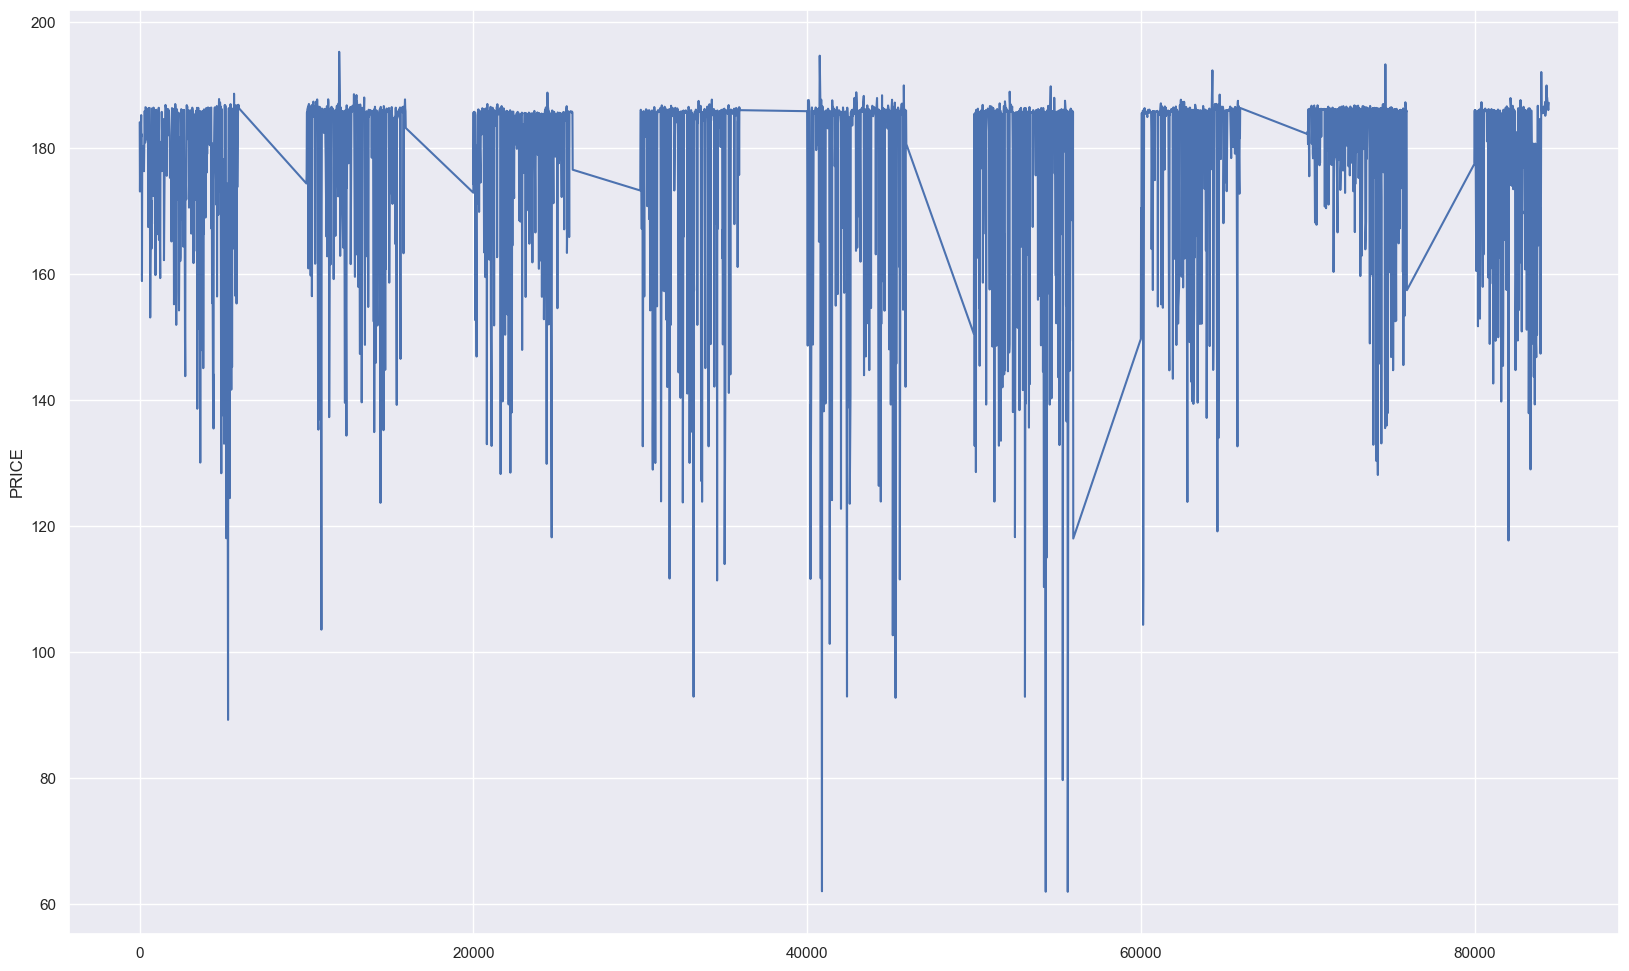

In [34]:
datasets['SBER'].dropna(inplace=True)
plt.figure(figsize = (20,12))
sns.lineplot(data=datasets['SBER'], x=[x_.hour*3600 + x_.minute*60 + x_.second for x_ in datasets['SBER'].index], y='PRICE')

<AxesSubplot:ylabel='PRICE'>

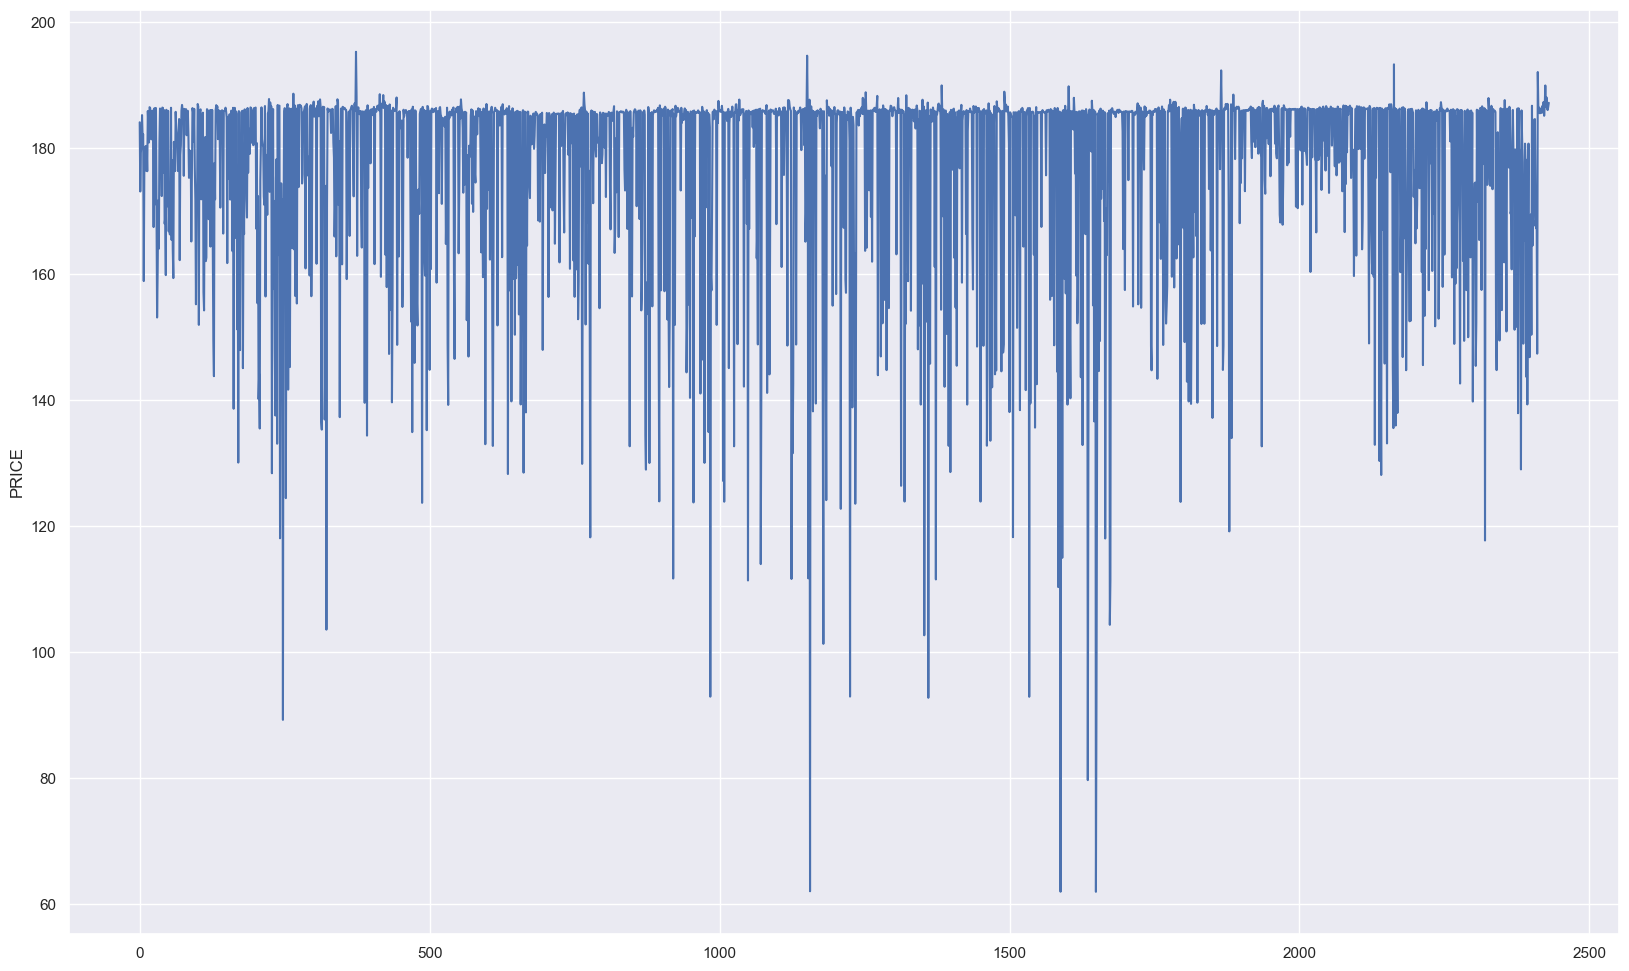

In [35]:
datasets['SBER']['cumvol'] = datasets['SBER'].dir_vol.cumsum()
plt.figure(figsize = (20,12))
sns.lineplot(data=datasets['SBER'], x=np.arange(len(datasets['SBER'])), y='PRICE')

In [ ]:
'''
И виолинплот
'''

<AxesSubplot:ylabel='PRICE'>

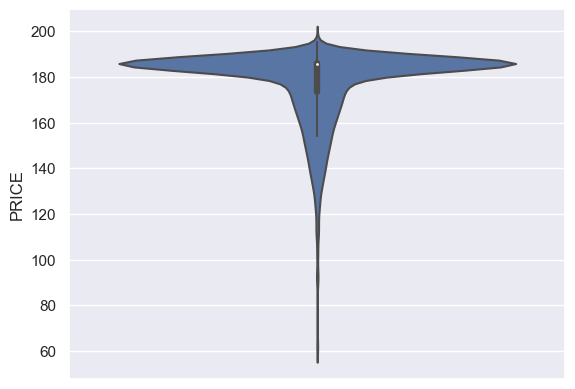

In [36]:
sns.violinplot(data=datasets['SBER'], y='PRICE')

In [37]:
datasets['SBER']['cumvol'] = datasets['SBER'].dir_vol.cumsum()

In [41]:
def preprocess(dataframe : pd.DataFrame, time = '15S'):
    dataframe.BUYSELL = dataframe.BUYSELL.replace({'B' : -1, 'S' : 1})
    dataframe['dir_vol'] = dataframe['VOLUME']*dataframe['BUYSELL']
    dataframe = dataframe.set_index('TIME')
    dataframe = dataframe.resample(time).aggregate({'dir_vol' : np.sum, 'PRICE' : np.mean})
    dataframe.dropna(inplace=True)
    dataframe['cumvol'] = dataframe.dir_vol.cumsum()
    return dataframe

In [42]:
datasets['POLY'] = preprocess(datasets['POLY'], '15S')
datasets['PLZL'] = preprocess(datasets['PLZL'], '15S')
datasets['AFKS'] = preprocess(datasets['AFKS'], '15S')

C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\2597337744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.BUYSELL = dataframe.BUYSELL.replace({'B' : -1, 'S' : 1})
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\2597337744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['dir_vol'] = dataframe['VOLUME']*dataframe['BUYSELL']
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\2597337744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [ ]:
'''
Строим два графика для PLZL
'''

<AxesSubplot:ylabel='PRICE'>

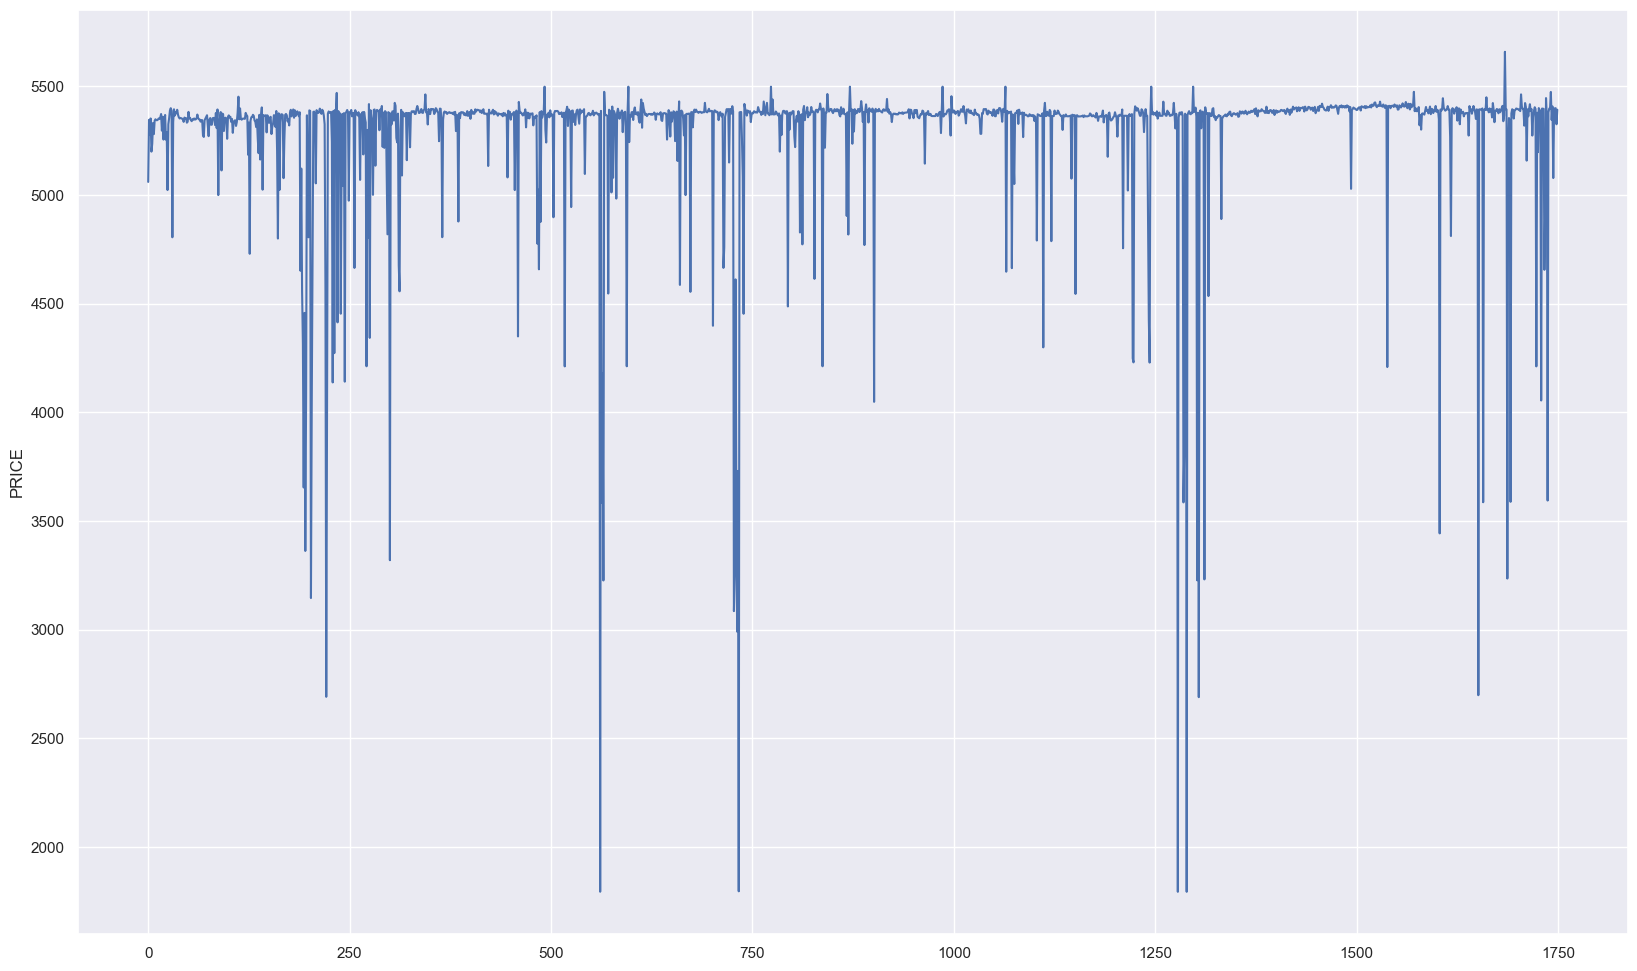

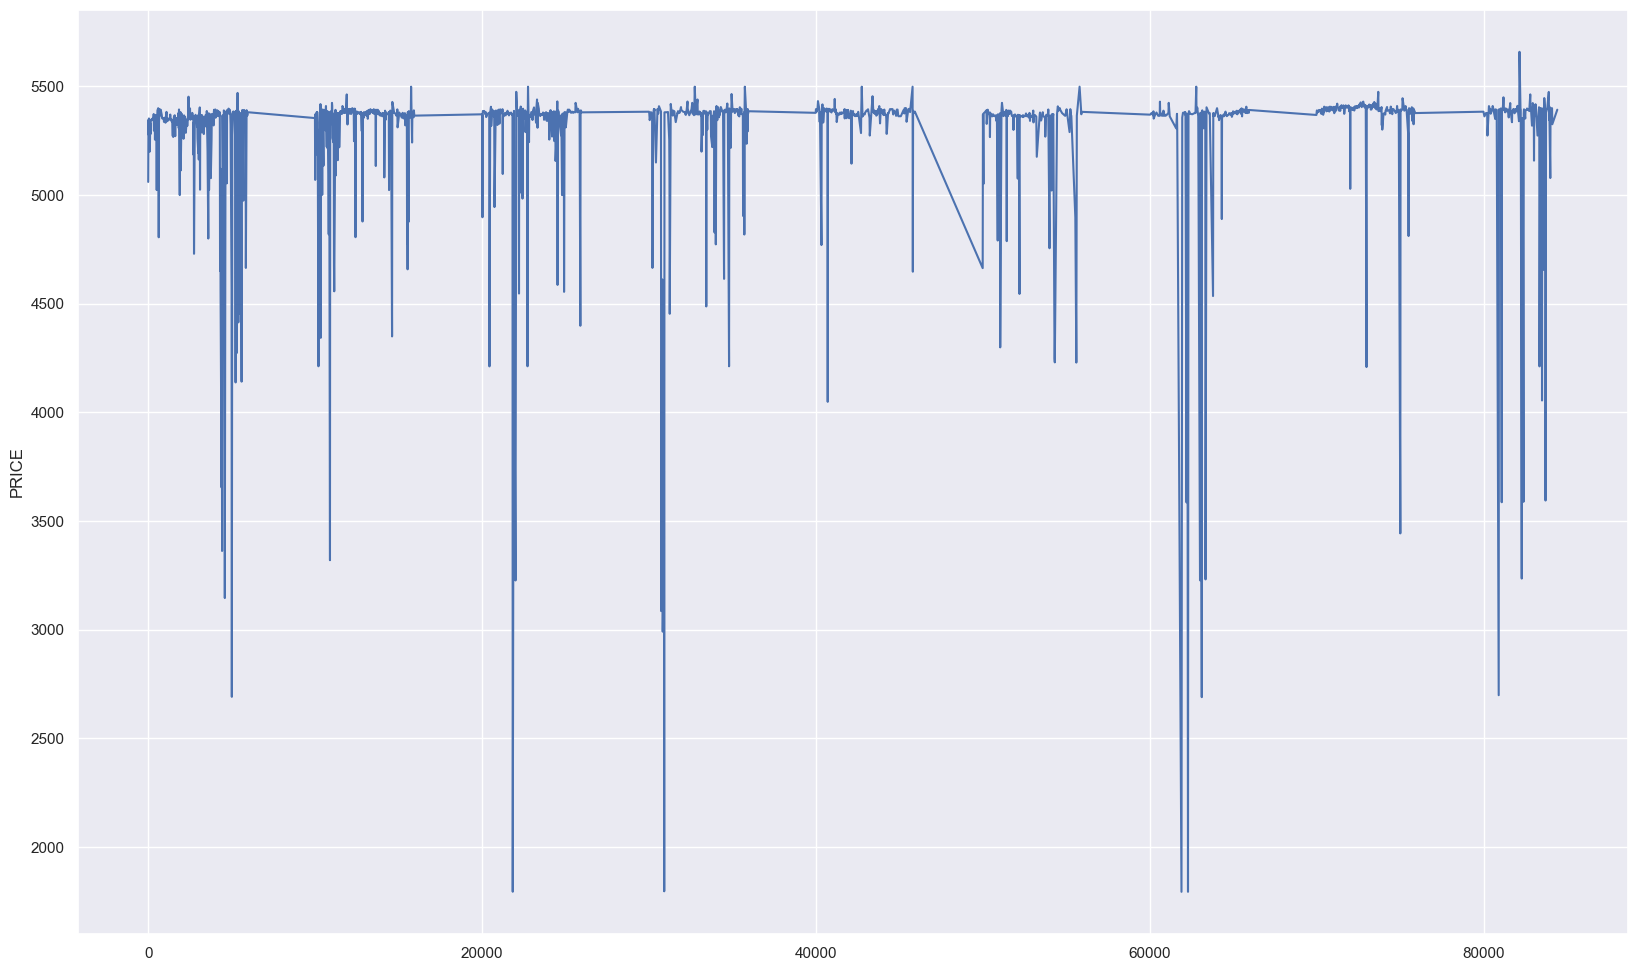

In [43]:
plt.figure(figsize = (20,12))
sns.lineplot(data=datasets['PLZL'], x=np.arange(len(datasets['PLZL'])), y='PRICE')
plt.figure(figsize = (20,12))
sns.lineplot(data=datasets['PLZL'], x=[x_.hour*3600 + x_.minute*60 + x_.second for x_ in datasets['PLZL'].index], y='PRICE')

In [ ]:
'''
И для POLY
'''

<AxesSubplot:ylabel='PRICE'>

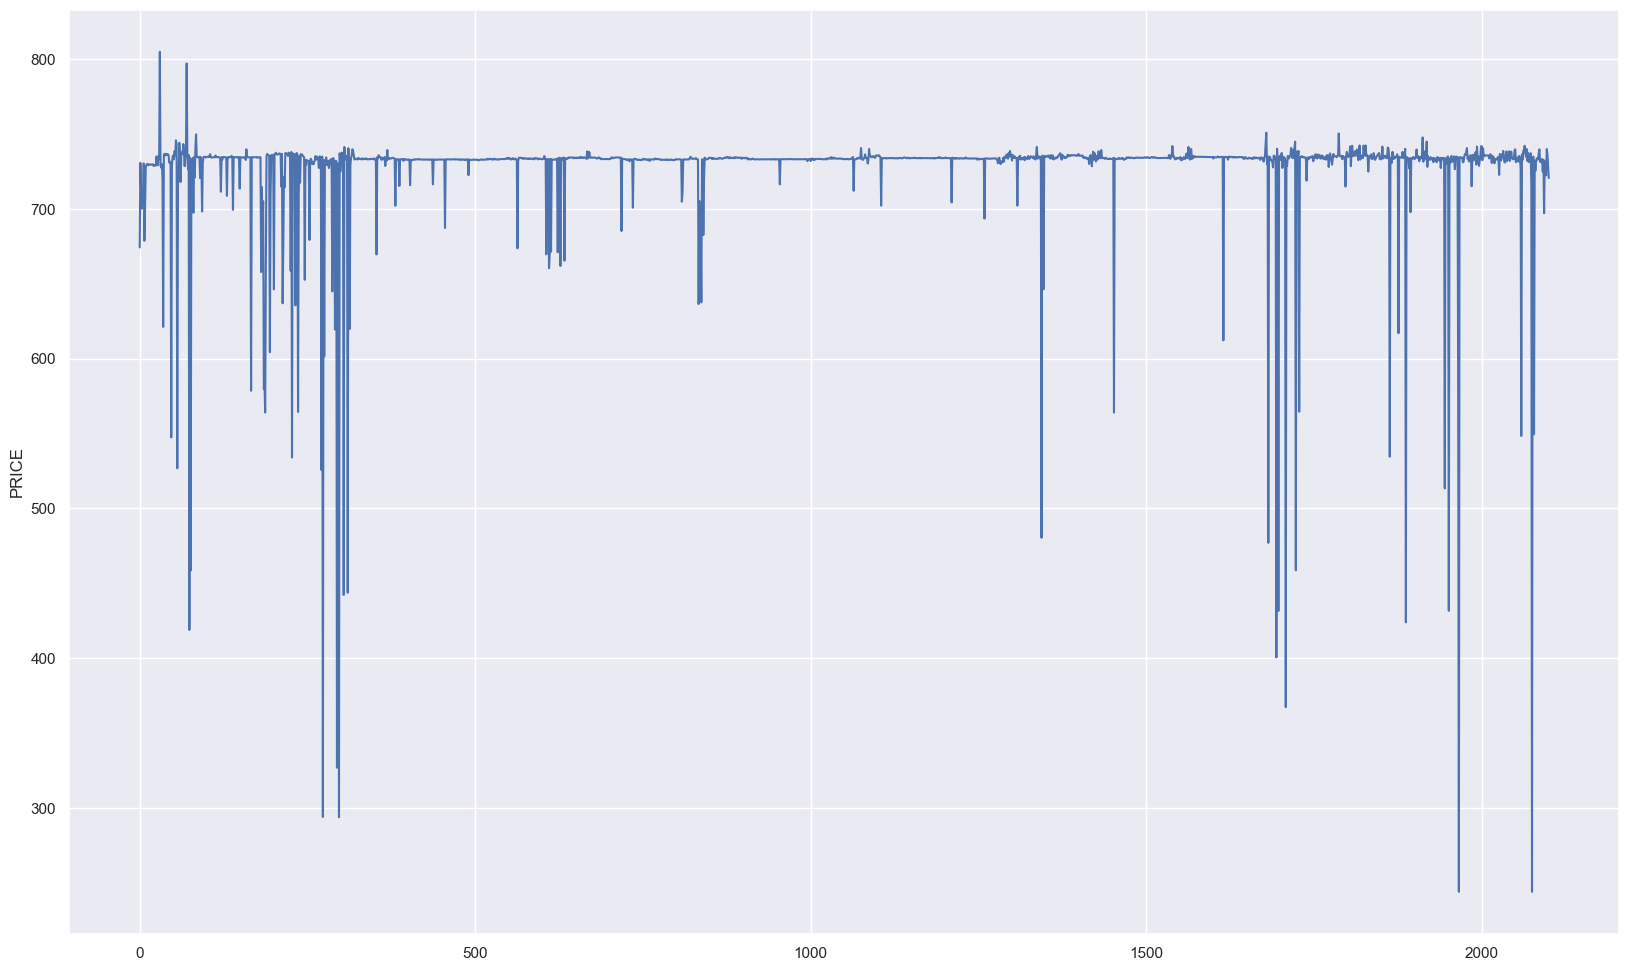

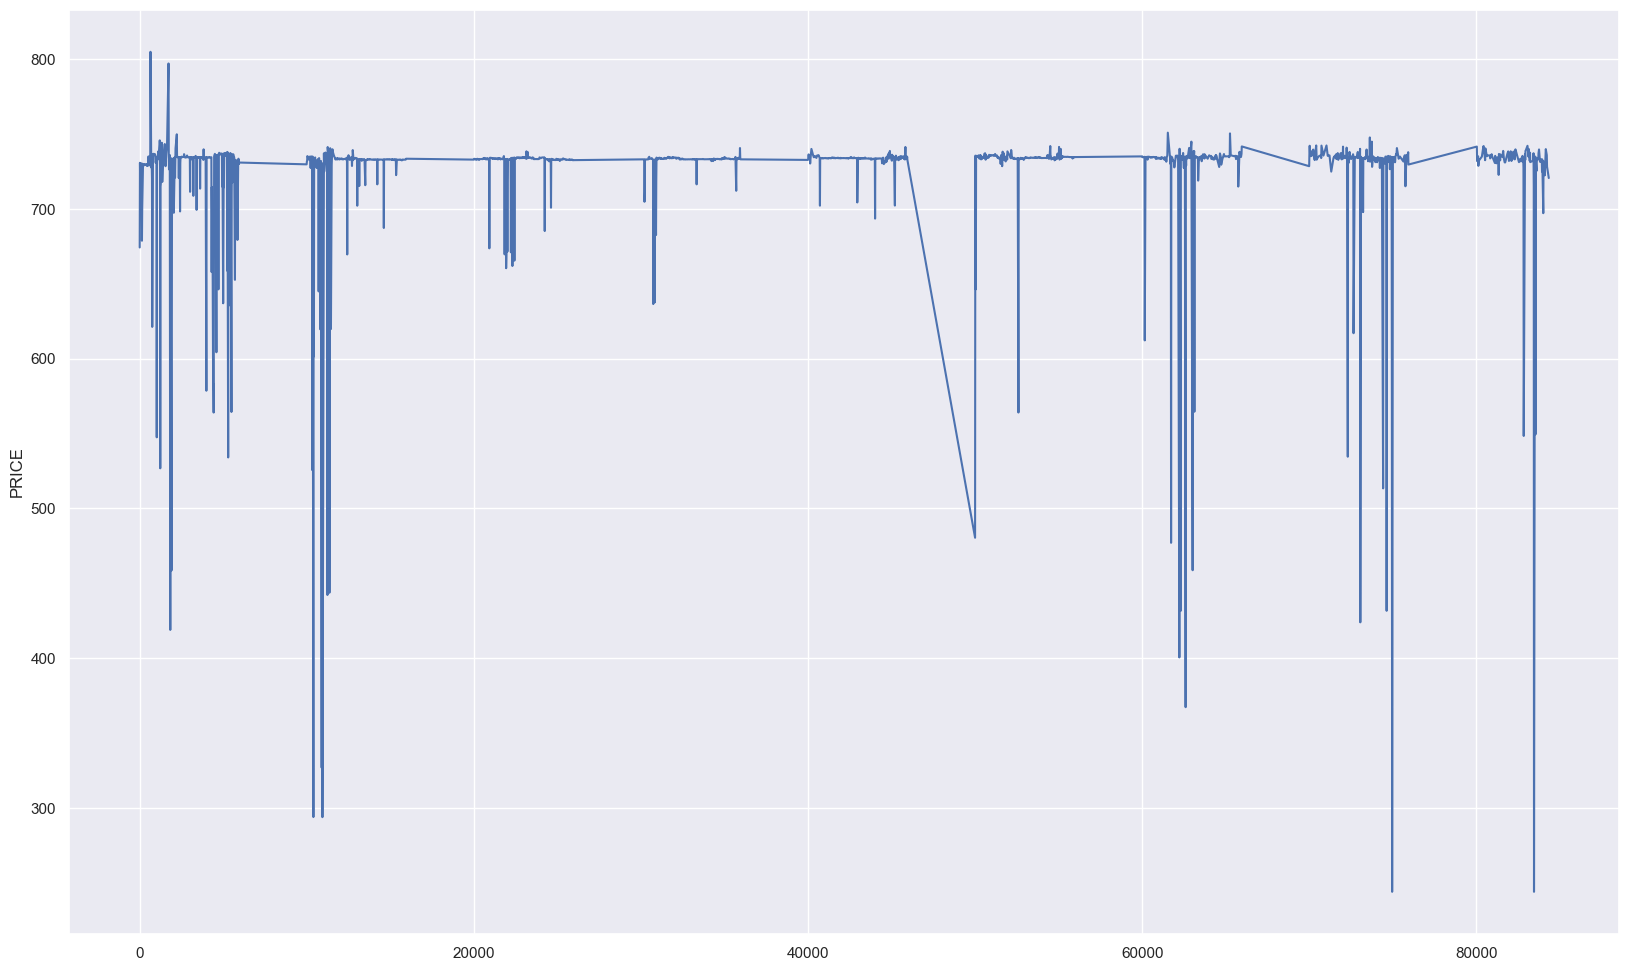

In [44]:
plt.figure(figsize = (20,12))
sns.lineplot(data=datasets['POLY'], x=np.arange(len(datasets['POLY'])), y='PRICE')
plt.figure(figsize = (20,12))
sns.lineplot(data=datasets['POLY'], x=[x_.hour*3600 + x_.minute*60 + x_.second for x_ in datasets['POLY'].index], y='PRICE')

In [ ]:
'''
AFKS
'''

<AxesSubplot:ylabel='PRICE'>

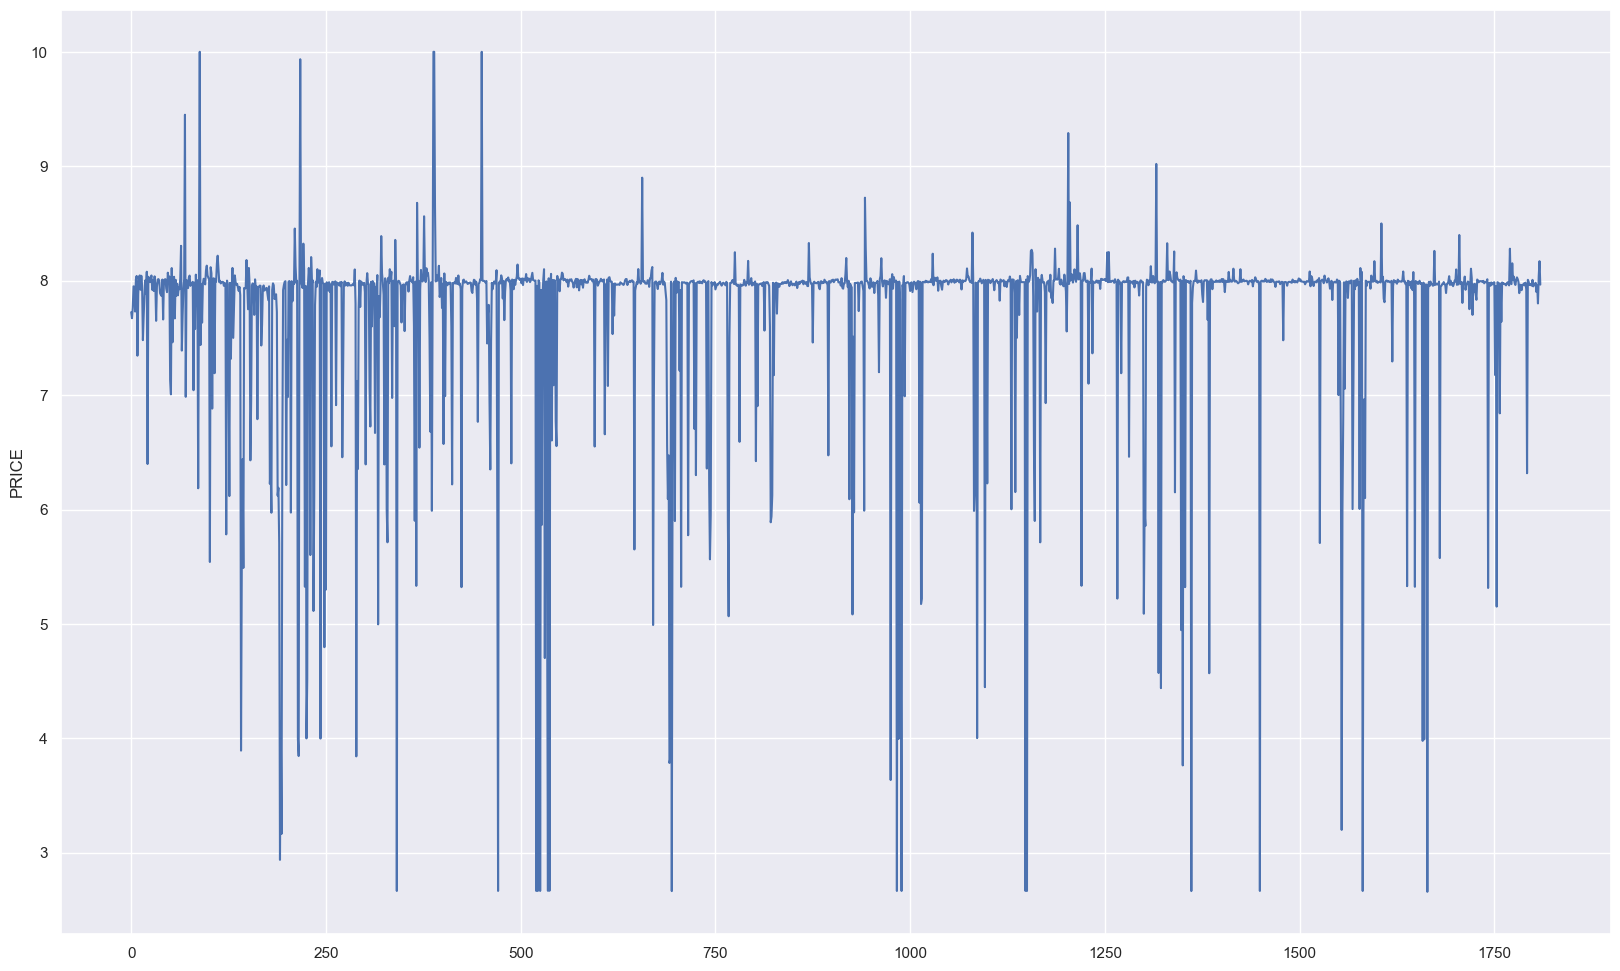

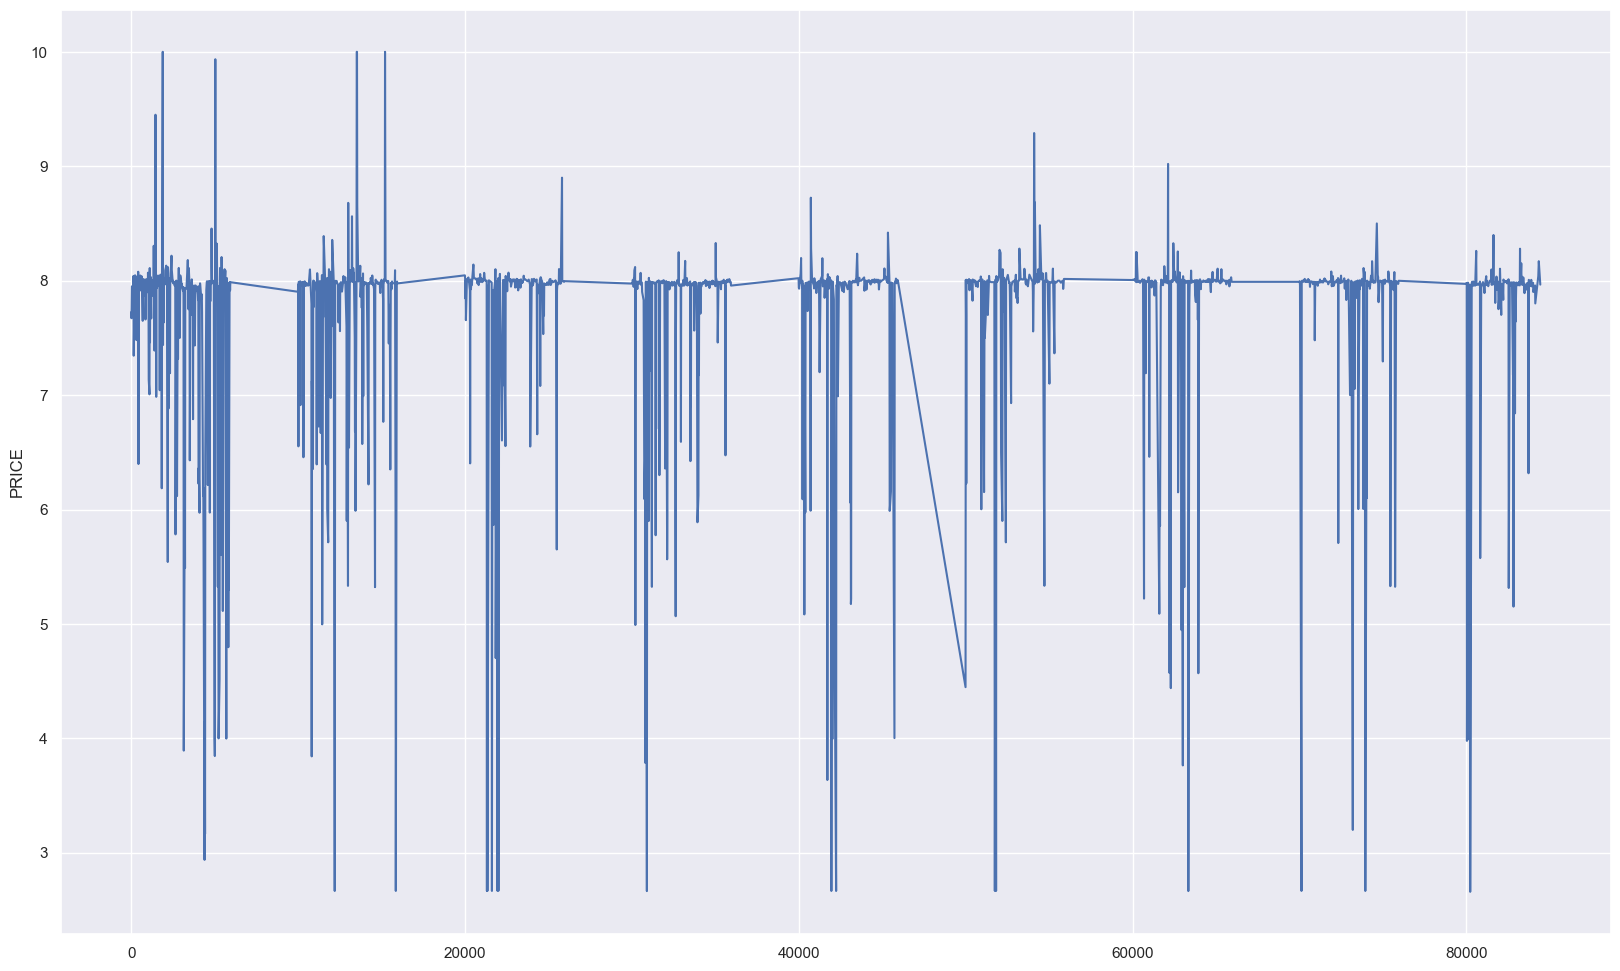

In [45]:
plt.figure(figsize = (20,12))
sns.lineplot(data=datasets['AFKS'], x=np.arange(len(datasets['AFKS'])), y='PRICE')

plt.figure(figsize = (20,12))
sns.lineplot(data=datasets['AFKS'], x=[x_.hour*3600 + x_.minute*60 + x_.second for x_ in datasets['AFKS'].index], y='PRICE')

In [ ]:
'''
Объемы по кумулятивной сумме для SBER
'''

<AxesSubplot:ylabel='cumvol'>

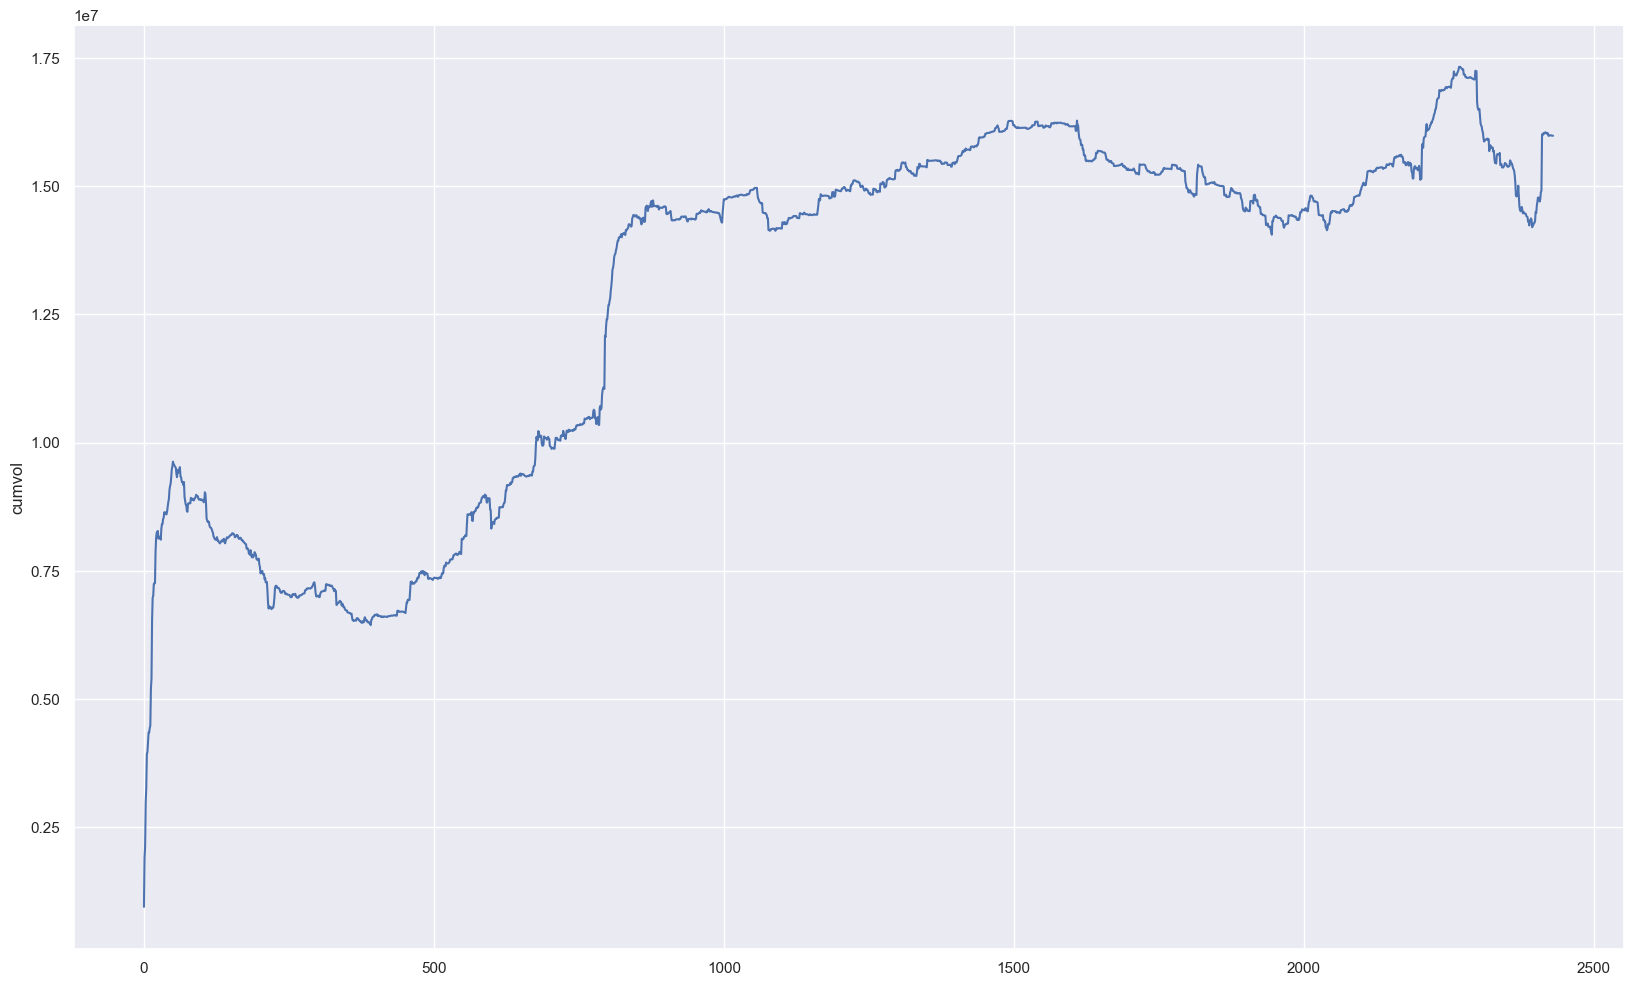

In [46]:
plt.figure(figsize = (20,12))
sns.lineplot(data=datasets['SBER'], x=np.arange(len(datasets['SBER'])), y='cumvol')

In [ ]:
'''
Объемы по кумулятивной сумме для PLZL
'''

<AxesSubplot:ylabel='cumvol'>

C:\Users\Luther\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


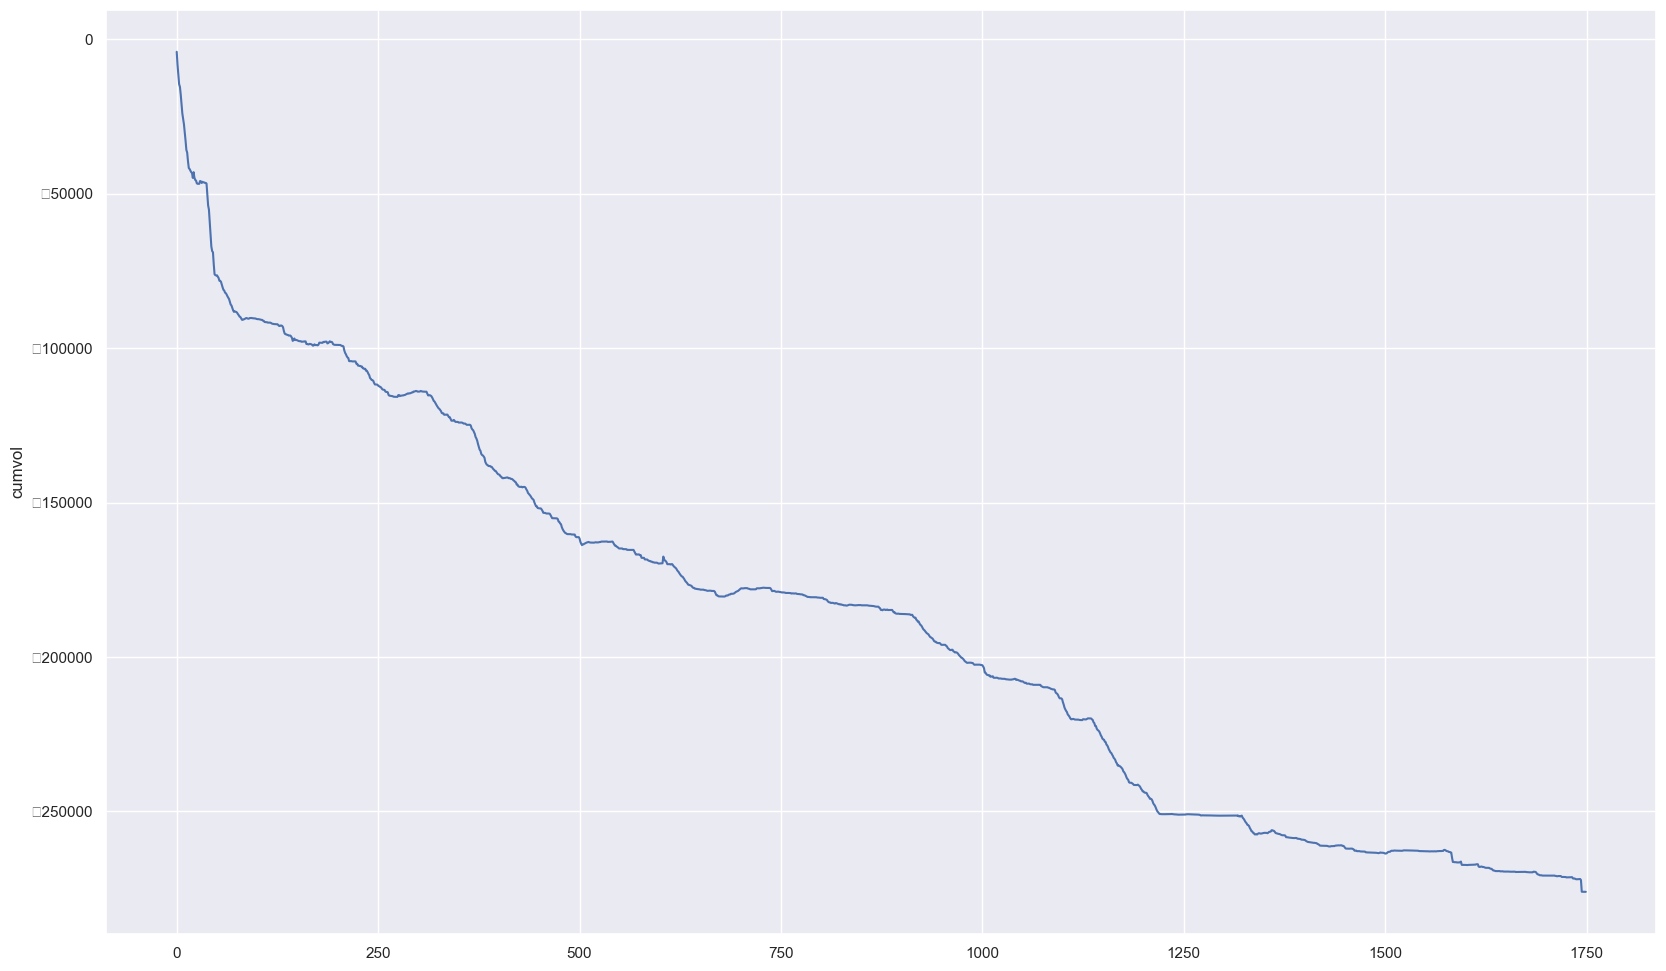

In [47]:
plt.figure(figsize = (20,12))
sns.lineplot(data=datasets['PLZL'], x=np.arange(len(datasets['PLZL'])), y='cumvol')

In [ ]:
'''
Объемы по кумулятивной сумме для POLY
'''

<AxesSubplot:ylabel='cumvol'>

C:\Users\Luther\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


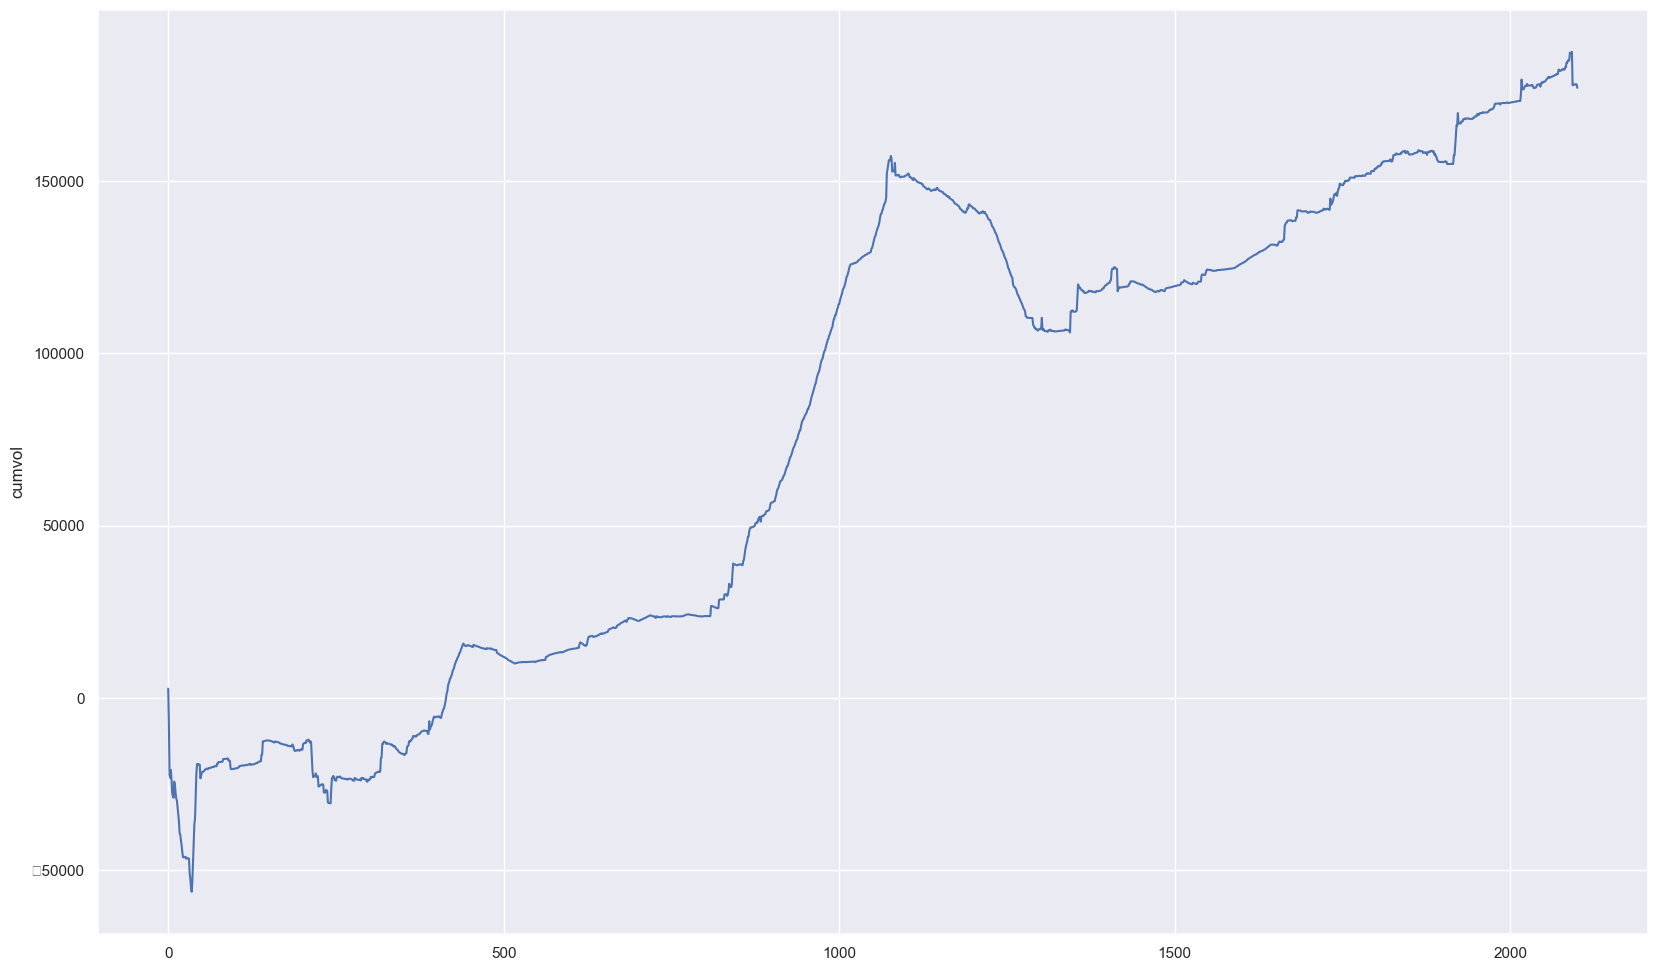

In [48]:
plt.figure(figsize = (20,12))
sns.lineplot(data=datasets['POLY'], x=np.arange(len(datasets['POLY'])), y='cumvol')

In [ ]:
'''
Объемы по кумулятивной сумме для AFKS
'''

<AxesSubplot:ylabel='cumvol'>

C:\Users\Luther\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


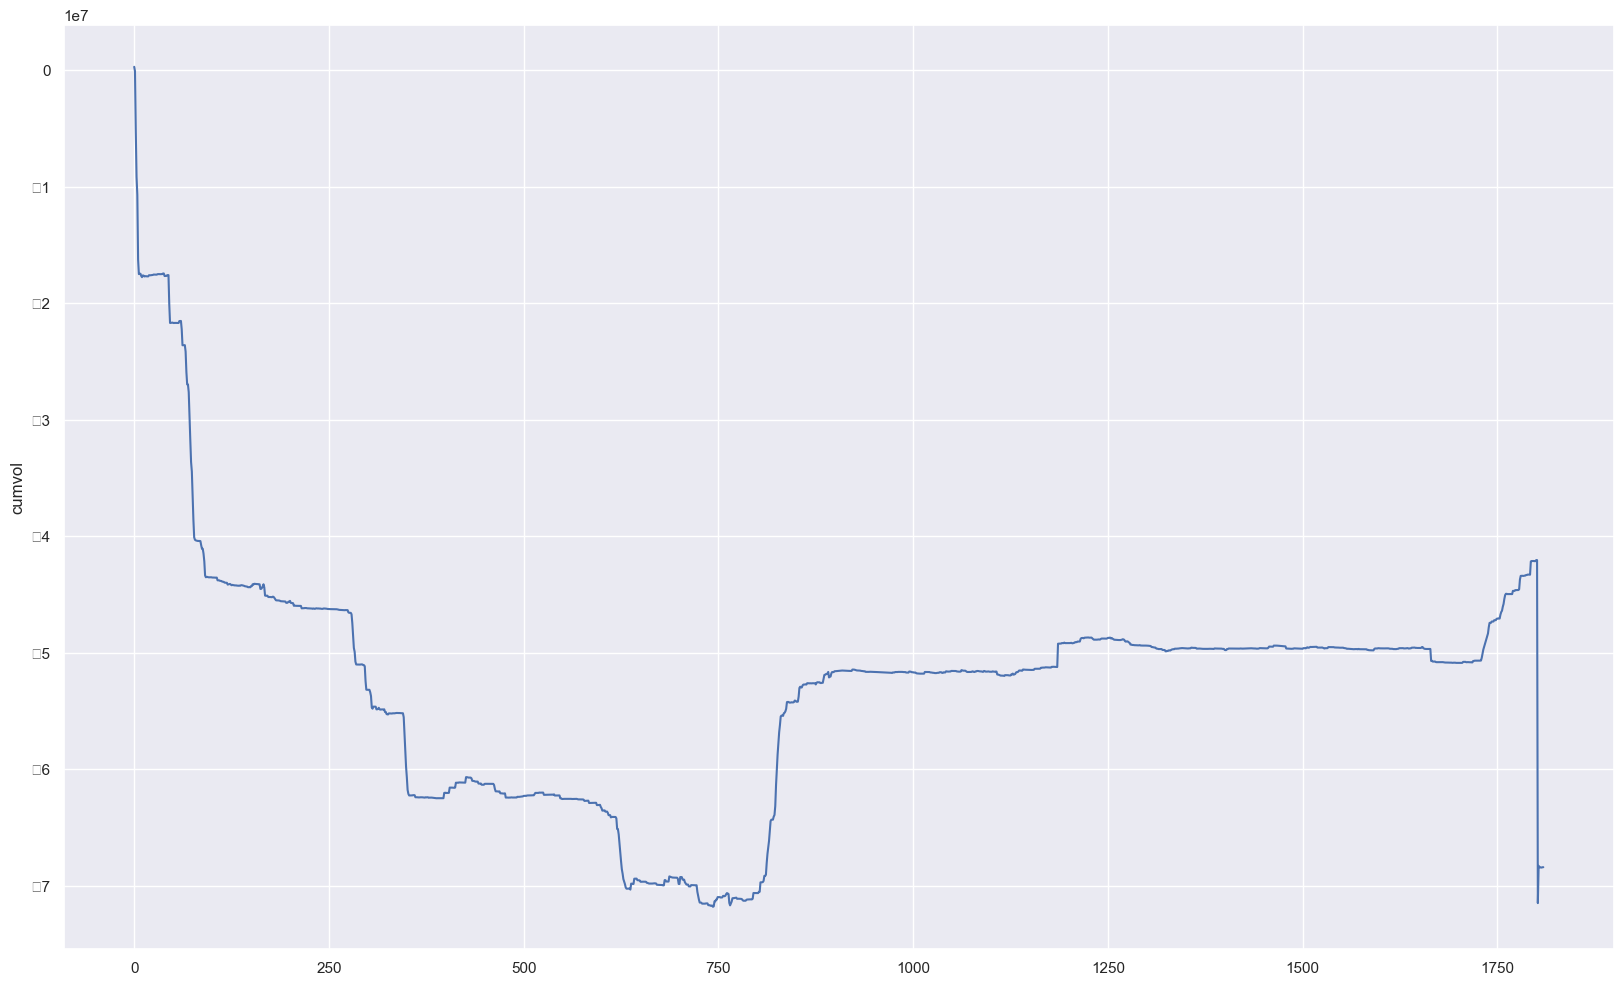

In [49]:
plt.figure(figsize = (20,12))
sns.lineplot(data=datasets['AFKS'], x=np.arange(len(datasets['AFKS'])), y='cumvol')

In [ ]:
'''
И совместный график
'''

<AxesSubplot:ylabel='cumvol'>

C:\Users\Luther\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


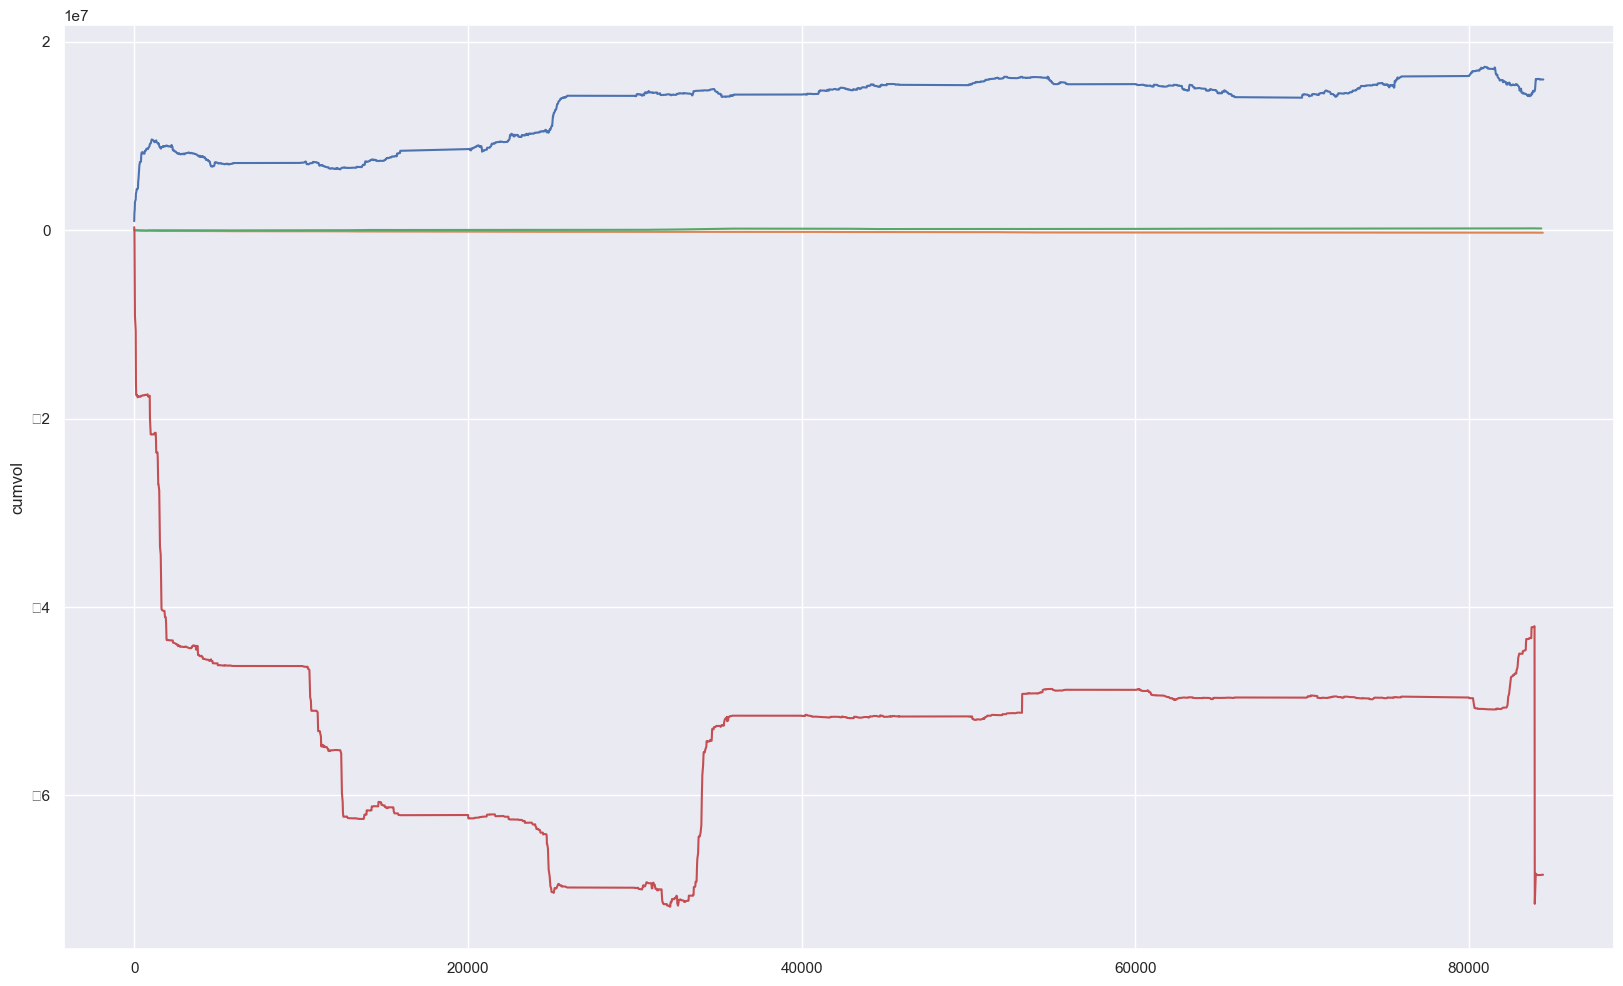

In [53]:
plt.figure(figsize = (20,12))
sns.lineplot(data=datasets['SBER'], x=[x_.hour*3600 + x_.minute*60 + x_.second for x_ in datasets['SBER'].index], y='cumvol')
sns.lineplot(data=datasets['PLZL'], x=[x_.hour*3600 + x_.minute*60 + x_.second for x_ in datasets['PLZL'].index], y='cumvol')
sns.lineplot(data=datasets['POLY'], x=[x_.hour*3600 + x_.minute*60 + x_.second for x_ in datasets['POLY'].index], y='cumvol')
sns.lineplot(data=datasets['AFKS'], x=[x_.hour*3600 + x_.minute*60 + x_.second for x_ in datasets['AFKS'].index], y='cumvol')

In [ ]:
'''
Видна разница в масштабе сделок.
Преобразуем схожим образом топ-20 акций.
'''

In [54]:
for ticker in best_companies[:20]:
    try:
        datasets[ticker] = preprocess(datasets[ticker])
    except:
        print(f'Акция {ticker} уже была преобразована')
        
processed_actions = {ticker: datasets[ticker] for ticker in best_companies[:20]}

from functools import reduce
cumulative_volumes_top20 = reduce(lambda  left,right: pd.merge(left,right, on='TIME'), [d.cumvol for d in processed_actions.values()])
cumulative_volumes_top20.set_axis(list(processed_actions.keys()), axis=1, inplace=True)

cumulative_volumes_top20

Акция SBER уже была преобразована


C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\2597337744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.BUYSELL = dataframe.BUYSELL.replace({'B' : -1, 'S' : 1})
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\2597337744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['dir_vol'] = dataframe['VOLUME']*dataframe['BUYSELL']
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\2597337744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Акция POLY уже была преобразована


C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\2597337744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.BUYSELL = dataframe.BUYSELL.replace({'B' : -1, 'S' : 1})
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\2597337744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['dir_vol'] = dataframe['VOLUME']*dataframe['BUYSELL']
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\2597337744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Акция PLZL уже была преобразована


C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\2597337744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.BUYSELL = dataframe.BUYSELL.replace({'B' : -1, 'S' : 1})
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\2597337744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['dir_vol'] = dataframe['VOLUME']*dataframe['BUYSELL']
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\2597337744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,SBER,TRNFP,SFIN,POLY,MOEX,MVID,GAZP,LKOH,SIBN,VTBR,MTLR,ROSN,MGNT,RUAL,TGKA,SBERP,PLZL,GMKN,ALRS,RASP
TIME,,,,,,,,,,,,,,,,,,,,
2018-12-29 00:00:00,942630,40,1140,2730,-320820,11350,93000,3857,60820,211250000,-7388,48870,-216,428380,480000000,106930,-4028,1715,-163850,397750
2018-12-29 00:00:15,1895910,39,2210,-7260,-316980,37510,58510,4002,59120,146500000,-126984,61920,-1863,679810,484900000,141710,-8141,1820,-223240,255310
2018-12-29 00:01:45,3923240,37,970,-23856,-198660,77390,701520,1317,56610,40150000,-225571,165910,-2120,992580,531400000,176420,-17898,545,-166240,-66050
2018-12-29 00:02:30,4343870,40,1110,-28907,-96620,73970,919560,-6001,51200,-110080000,-238226,175540,740,1236710,537100000,144440,-25694,393,-120570,-275470
2018-12-29 00:03:15,4344020,39,1030,-24233,-90170,73160,942410,-8475,51870,-188690000,-233085,175110,858,1188620,537600000,94870,-27526,432,-111990,-328450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-29 19:45:00,14544950,-125600,71160,157530,4694820,-2319050,7863310,211778,-10011210,14726150000,-9167448,-1786490,23528,2140410,-135412700000,-113750,-261771,8587,-386060,1574920
2018-12-29 23:04:15,14807690,-126719,68320,180332,3125540,-2324210,9405700,239588,-10262270,15762670000,-9764358,-1604560,18045,2066960,-168157200000,397190,-271035,9491,627100,670670
2018-12-29 23:15:15,14285290,-127030,68970,184242,2782860,-2324110,9383450,238087,-10259470,16159750000,-9870395,-1613840,21582,2271880,-169030700000,240450,-272018,12402,777310,706300


In [ ]:
'''
Посмотрим корелляцию по топ-20
'''

C:\Users\Luther\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\Luther\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


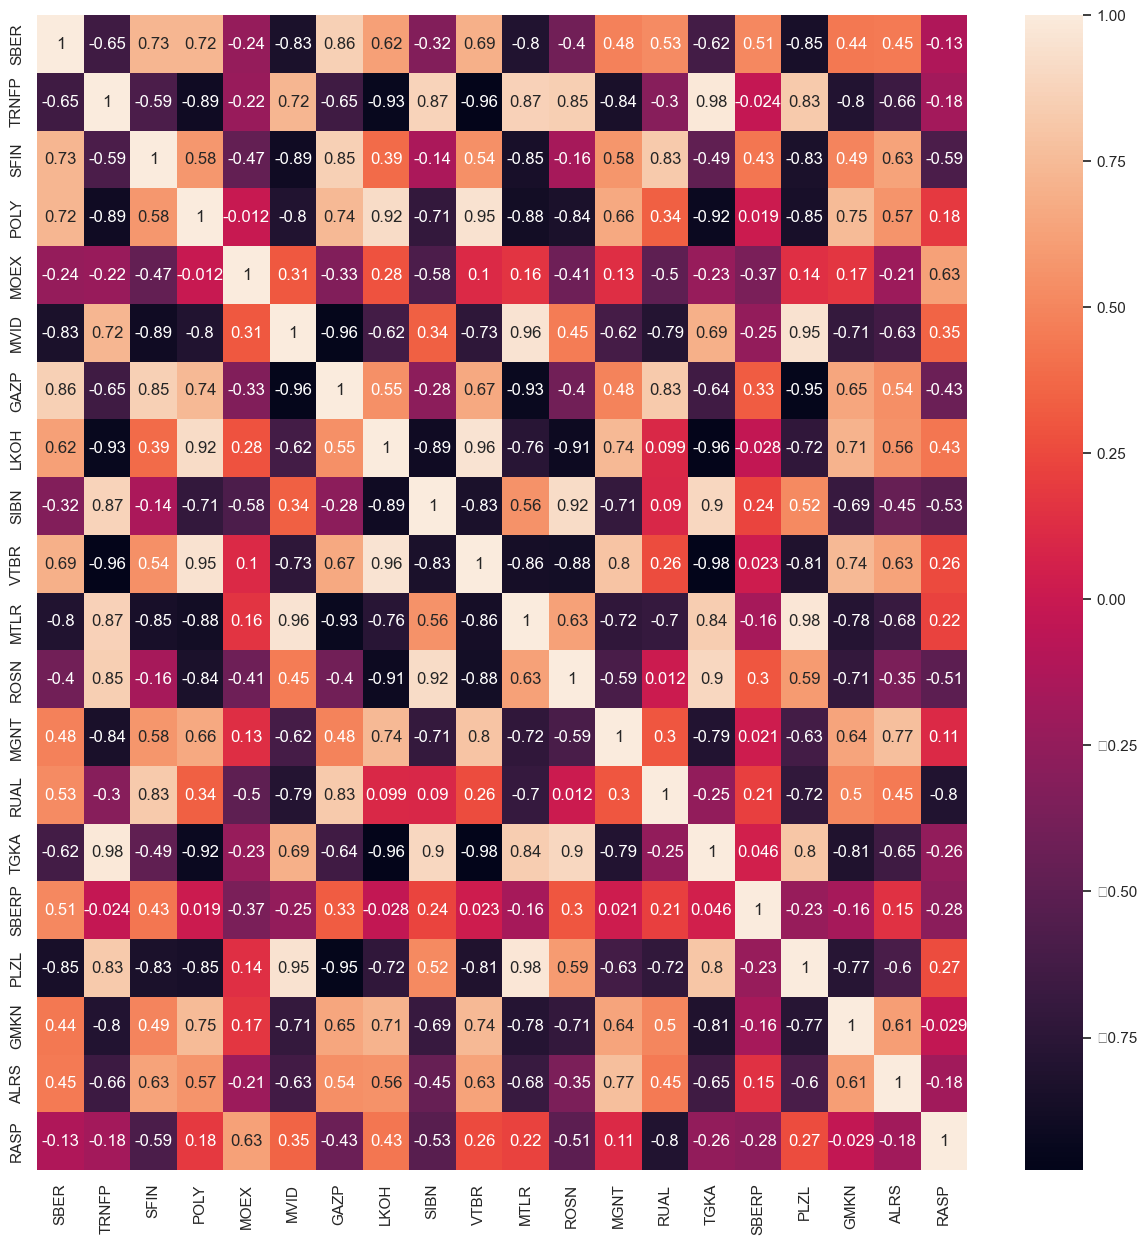

In [55]:
correlations = cumulative_volumes_top20.corr()

plt.figure(figsize = (15,15))
sns.heatmap(correlations, annot=True)

In [ ]:
'''
Нормальные ли мы рассматриваем выборки?
'''

In [56]:
from scipy import stats
alpha = 0.05
for name in cumulative_volumes_top20.columns:
    x = cumulative_volumes_top20[name]
    k2, p = stats.normaltest(x)
    print(f'p-value of {name} normal test: {p}')
    if p < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    print('____________________________________________')

p-value of SBER normal test: 0.2707502318397903
The null hypothesis cannot be rejected
____________________________________________
p-value of TRNFP normal test: 3.168045695579237e-10
The null hypothesis can be rejected
____________________________________________
p-value of SFIN normal test: 0.0
The null hypothesis can be rejected
____________________________________________
p-value of POLY normal test: 1.3983412338516108e-05
The null hypothesis can be rejected
____________________________________________
p-value of MOEX normal test: 8.333931081736938e-07
The null hypothesis can be rejected
____________________________________________
p-value of MVID normal test: 8.287089919121548e-29
The null hypothesis can be rejected
____________________________________________
p-value of GAZP normal test: 2.3811355040835488e-06
The null hypothesis can be rejected
____________________________________________
p-value of LKOH normal test: 2.4576826697283024e-12
The null hypothesis can be rejected
___

In [ ]:
'''
Нулевая гипотеза не может быть отвергнута в 17 случаях из 20.
Повторим эксперимент с ценами.
'''

In [57]:
cumulative_prices_top20 = reduce(lambda  left,right: pd.merge(left,right, on='TIME'), [d.PRICE for d in processed_actions.values()])
cumulative_prices_top20.set_axis(list(processed_actions.keys()), axis=1, inplace=True)

C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\3233056262.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'PRICE_x'} in the result is deprecated and will raise a MergeError in a future version.
  cumulative_prices_top20 = reduce(lambda  left,right: pd.merge(left,right, on='TIME'), [d.PRICE for d in processed_actions.values()])
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\3233056262.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'PRICE_x'} in the result is deprecated and will raise a MergeError in a future version.
  cumulative_prices_top20 = reduce(lambda  left,right: pd.merge(left,right, on='TIME'), [d.PRICE for d in processed_actions.values()])
C:\Users\Luther\AppData\Local\Temp\ipykernel_13272\3233056262.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'PRICE_x'} in the result is deprecated and will raise a MergeError in a future version.
  cumulative_prices_top20 = reduce(lambda  left,right: pd.merge(lef

<AxesSubplot:>

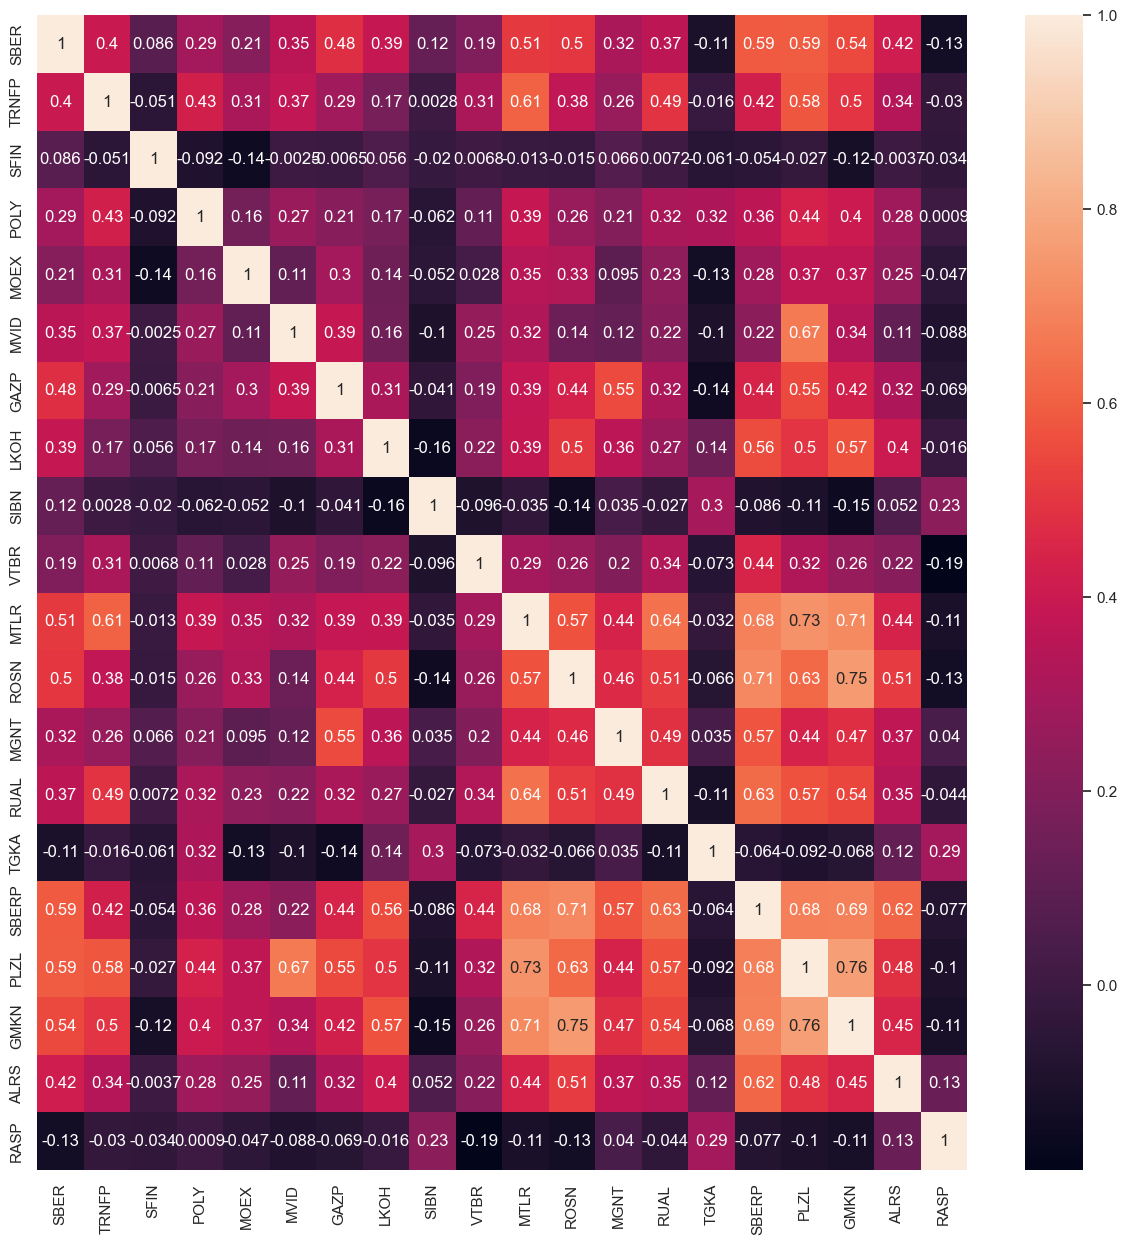

In [58]:
correlations = cumulative_prices_top20.corr()

plt.figure(figsize = (15,15))
sns.heatmap(correlations, annot=True)

In [ ]:
'''
Оценим визуально
'''

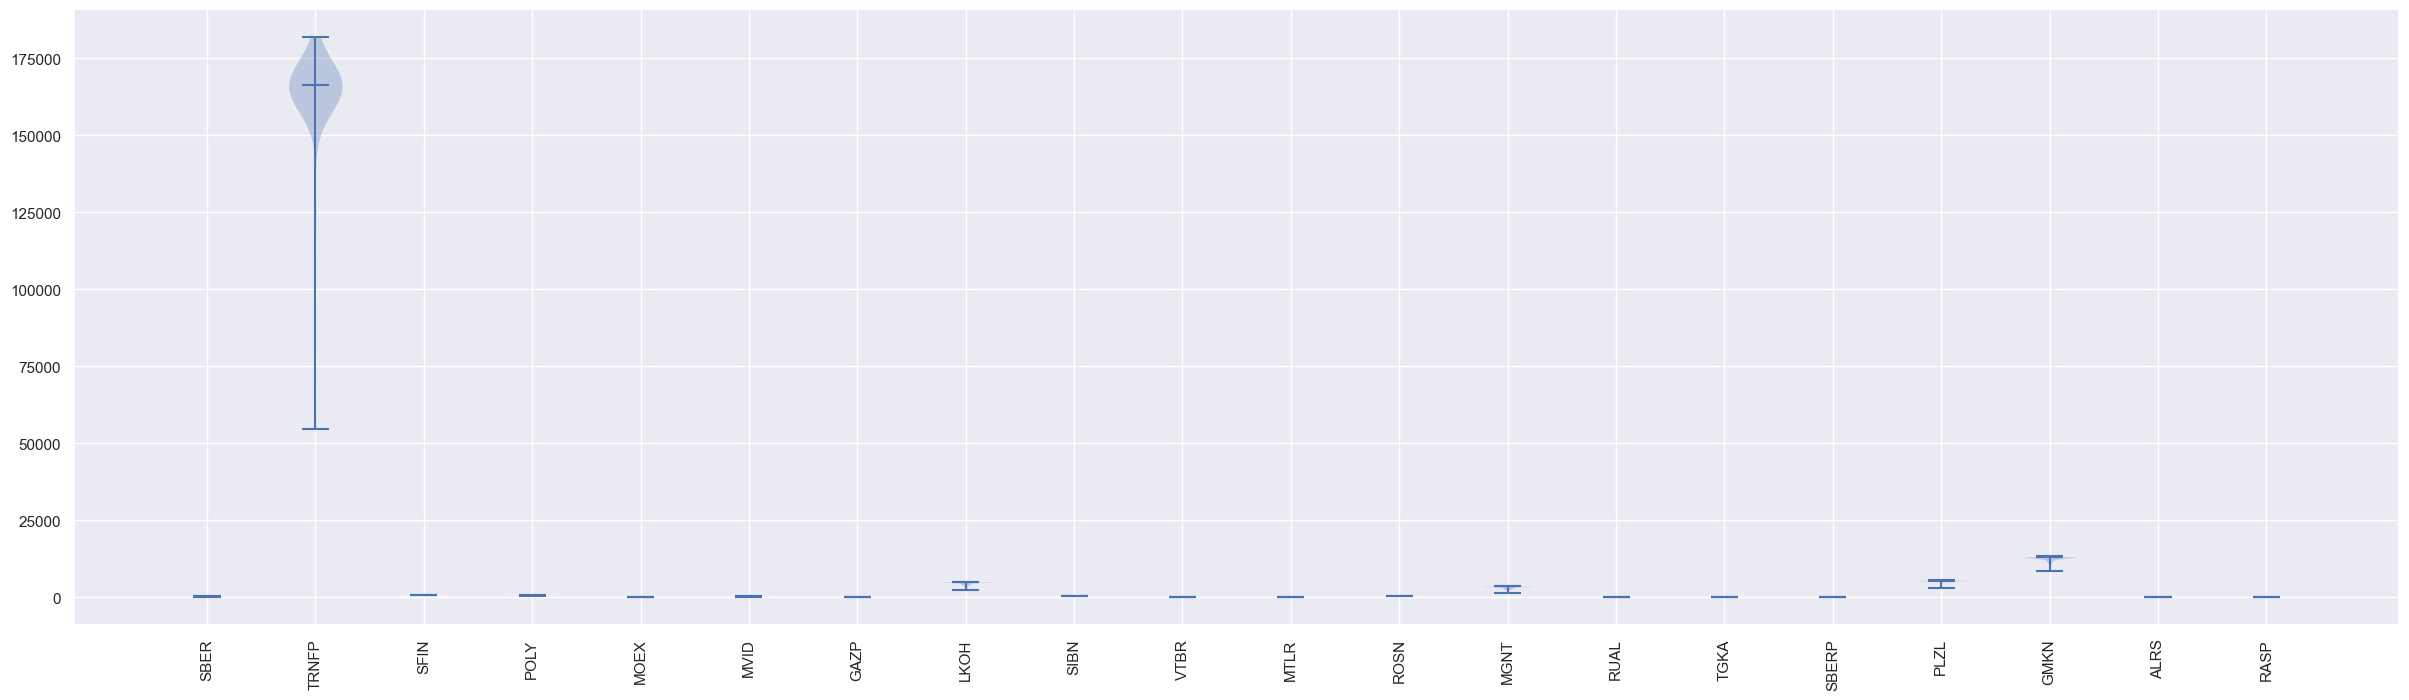

In [59]:
def draw_custom_violin(df, title=''):
    plt.figure(figsize=(30,8))
    plt.title(title)
    df_cols = df.columns.values
    plt.xticks(1+np.arange(len(df_cols)), df_cols, rotation='vertical')
    plt.violinplot(df, showmedians=True);
draw_custom_violin(cumulative_prices_top20)

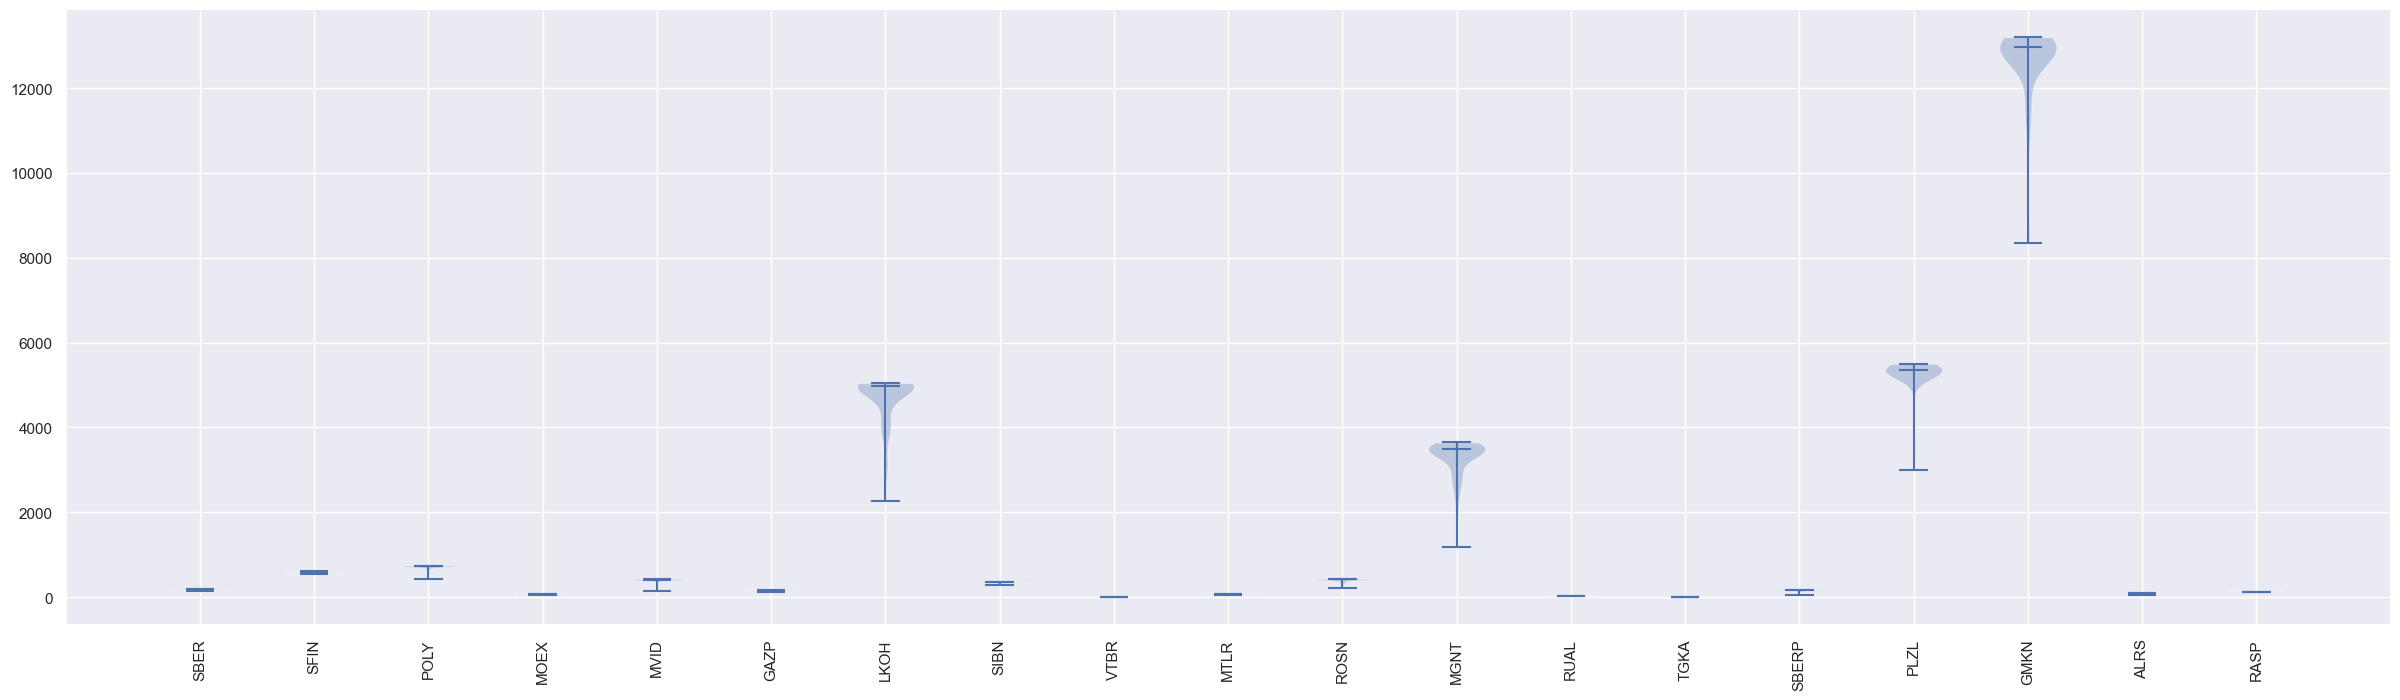

In [60]:
draw_custom_violin(cumulative_prices_top20.drop(columns = ['TRNFP']))

In [ ]:
'''
QQ-диаграмы
'''

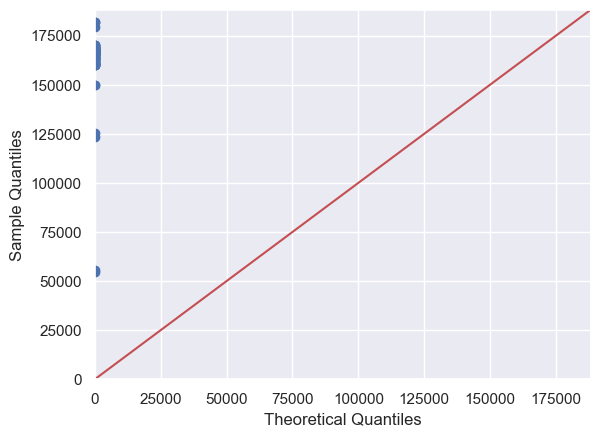

In [61]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot(cumulative_prices_top20['TRNFP'], line='45')
pylab.show()

C:\Users\Luther\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


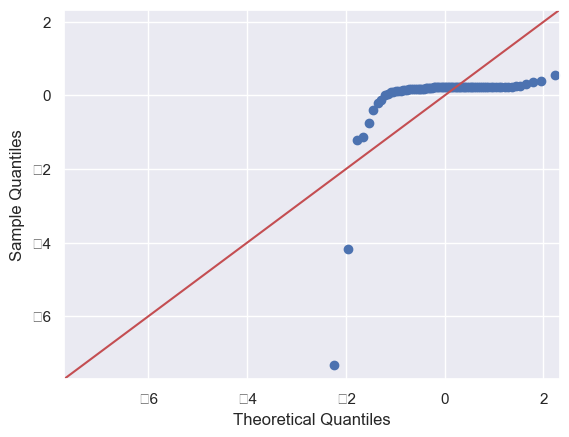

In [62]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

sm.qqplot((cumulative_prices_top20['MVID'] - cumulative_prices_top20['MVID'].mean())/cumulative_prices_top20['MVID'].std(), line='45')
pylab.show()

In [ ]:
'''
Потенциальные причины неудачи:
-Малый объем данных
-Распределения признаков, отличные от нормальных
-Недостаточная предобработка
Пути для исправления проблемы:
-Применение преобразований, отображающих наши распределения на нормальные
-Большая выборка данных
-Вычисление изменений цен акций, вместо самих цен
'''